___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [243]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from scipy import stats

#### *ii. Load Dataset*

In [244]:
df=pd.read_csv("covtype.csv")

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [246]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...    Soil_Type32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [247]:
df.shape

(581012, 55)

In [248]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [249]:
unique_list = []
for col in df:
    unique_list.append(len(df[col].unique()))
np.array(unique_list)

array([1978,  361,   67,  551,  700, 5785,  207,  185,  255, 5827,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    7])

<AxesSubplot:>

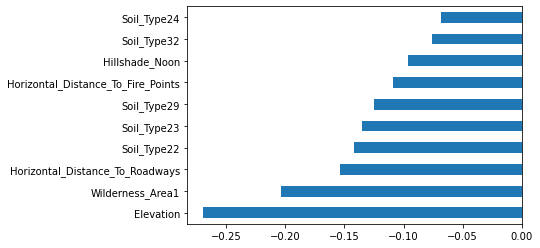

In [250]:
df.corr()["Cover_Type"].sort_values().head(10).plot.barh()

<AxesSubplot:>

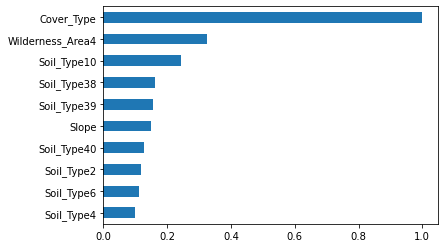

In [251]:
df.corr()["Cover_Type"].sort_values().tail(10).plot.barh()

<AxesSubplot:ylabel='Frequency'>

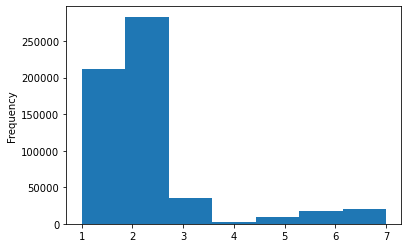

In [252]:
df["Cover_Type"].plot.hist(bins = 7)

In [253]:
df.corr()[-1:].T.sort_values(by = "Cover_Type", ascending = False)

Cover_Type
Cover_Type                            1.000000
Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Aspect                                0.017080
Soil_Type16                           0.009844
Soil_Type18                           0.007390
Soil_Type15                           0.006425
Soil_Type34                           0.004643
Soil_Type26                          -0.000375
Soil_Type7                           -0.000496
Soil_Type28                          -0.001702
Soil_Type8                           -0.003667
Soil_Type9                           -0.006110
Soil_Type25                          -0.006449
Soil_Type30                          -0.010436
Soil_Type27                          -0.014407
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type12                          -0.023601
Soil_Type21                          -0.025400
Soil_Type20                          -0.028665
Hillshade_9am                        -0.035415
Soil_Type19                          -0.036452
Wilderness_Area2                     -0.048059
Hillshade_3pm                        -0.048290
Soil_Type33                          -0.062502
Soil_Type31                          -0.065347
Soil_Type24                          -0.068746
Soil_Type32                          -0.075562
Hillshade_Noon                       -0.096426
Horizontal_Distance_To_Fire_Points   -0.108936
Soil_Type29                          -0.124933
Soil_Type23                          -0.135055
Soil_Type22                          -0.141746
Horizontal_Distance_To_Roadways      -0.153450
Wilderness_Area1                     -0.203913
Elevation                            -0.269554

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [254]:
df.isnull().sum()*100/df.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [255]:
for col in df.iloc[:,:10]:
    for counter in range(1,len(df["Cover_Type"].unique())+1):
        
        Q1 = df[df["Cover_Type"]==counter][col].quantile(0.25)
        Q3 = df[df["Cover_Type"]==counter][col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-1.5*IQR
        upper_lim = Q3+1.5*IQR
        print(f" count of outlier in {col} column by Cover_Type {counter}= {df[df['Cover_Type']==counter][(df[df['Cover_Type']==counter][col] < lower_lim) | (df[df['Cover_Type']==counter][col] > upper_lim)][col].count()} ")
    print()

 count of outlier in Elevation column by Cover_Type 1= 3931 
 count of outlier in Elevation column by Cover_Type 2= 838 
 count of outlier in Elevation column by Cover_Type 3= 0 
 count of outlier in Elevation column by Cover_Type 4= 0 
 count of outlier in Elevation column by Cover_Type 5= 181 
 count of outlier in Elevation column by Cover_Type 6= 442 
 count of outlier in Elevation column by Cover_Type 7= 850 

 count of outlier in Aspect column by Cover_Type 1= 0 
 count of outlier in Aspect column by Cover_Type 2= 0 
 count of outlier in Aspect column by Cover_Type 3= 0 
 count of outlier in Aspect column by Cover_Type 4= 325 
 count of outlier in Aspect column by Cover_Type 5= 0 
 count of outlier in Aspect column by Cover_Type 6= 0 
 count of outlier in Aspect column by Cover_Type 7= 0 

 count of outlier in Slope column by Cover_Type 1= 3704 
 count of outlier in Slope column by Cover_Type 2= 3189 
 count of outlier in Slope column by Cover_Type 3= 23 
 count of outlier in Slop

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

In [256]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        df_outlier
        
               
    return(plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [257]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    return z_score_inspect
    plt.show()

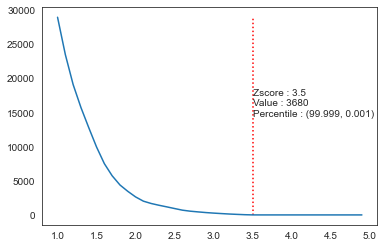

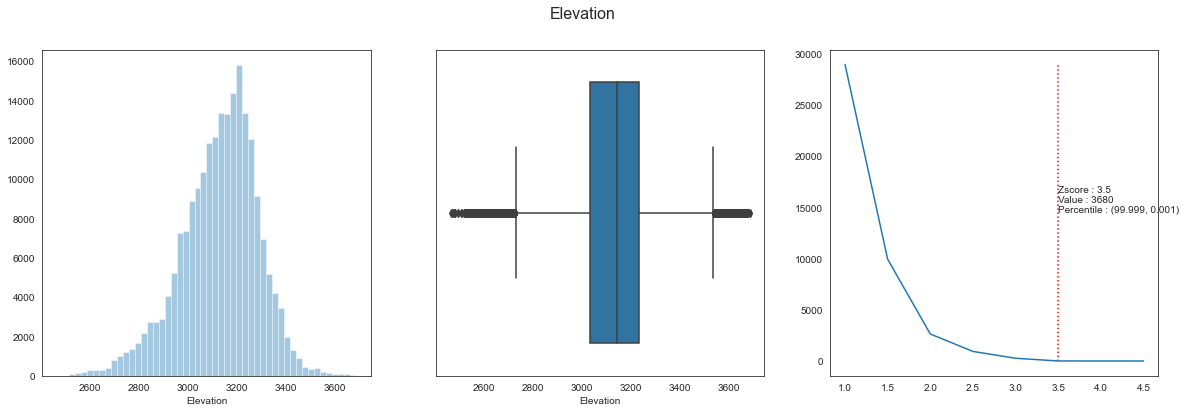

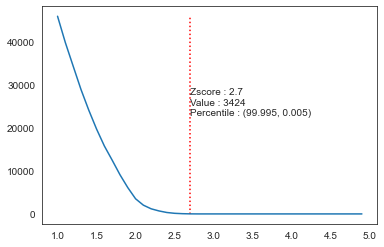

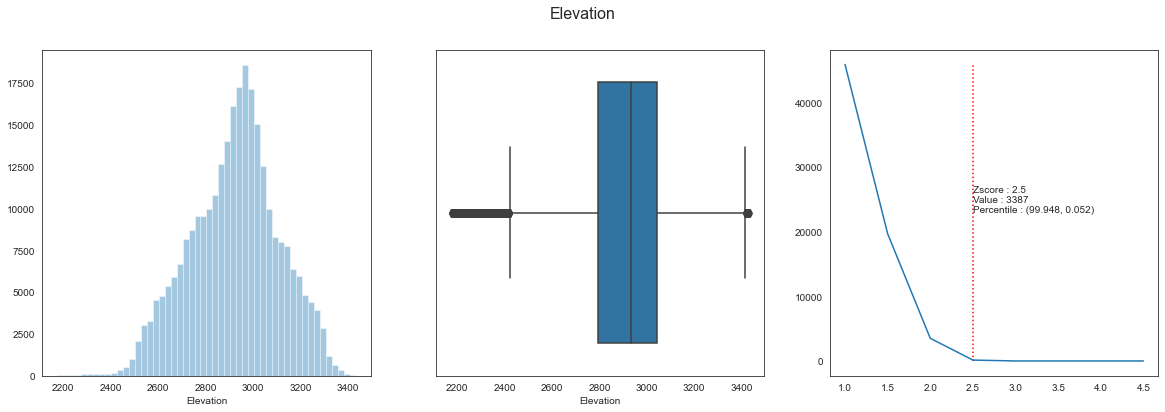

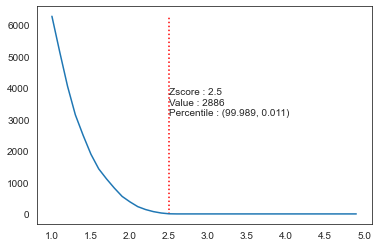

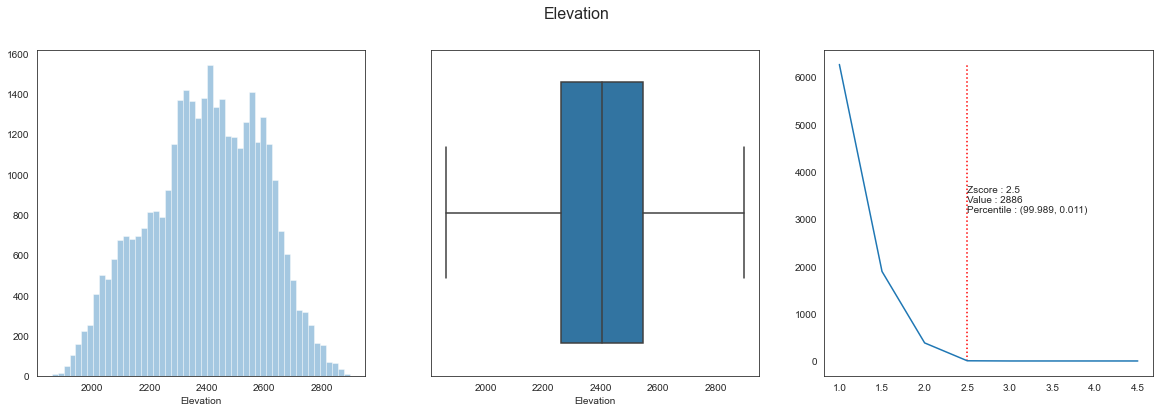

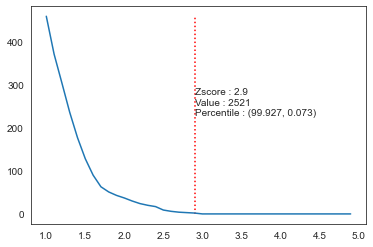

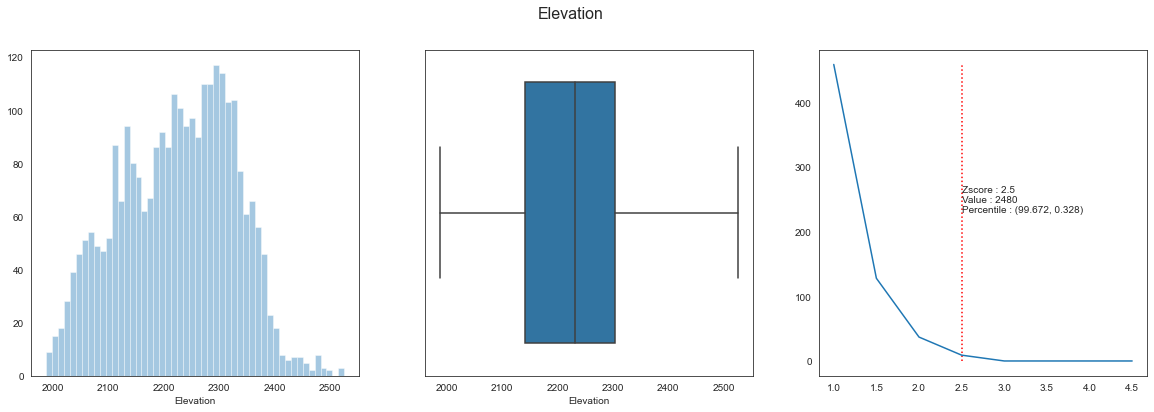

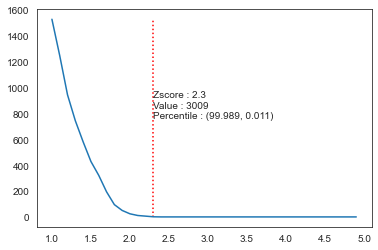

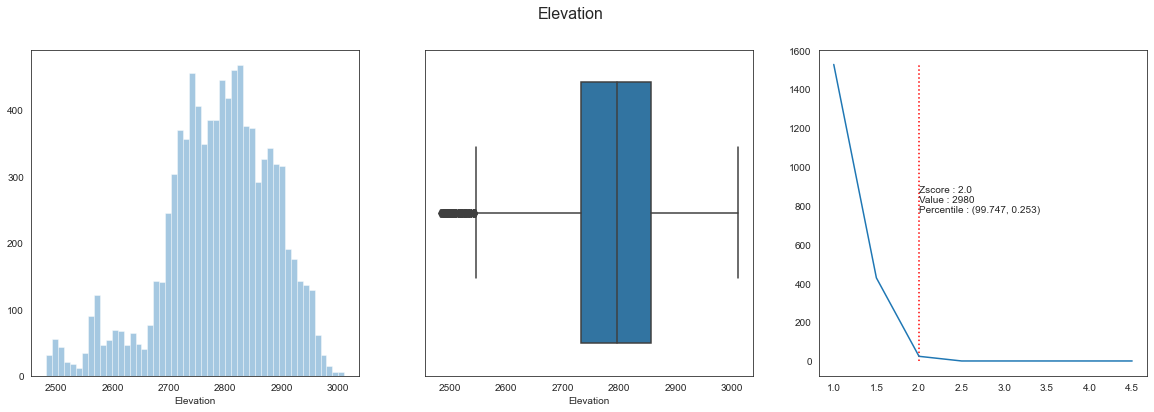

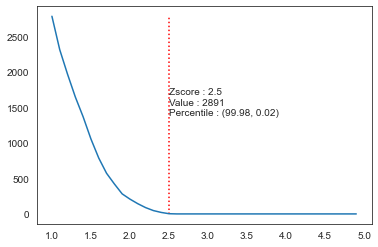

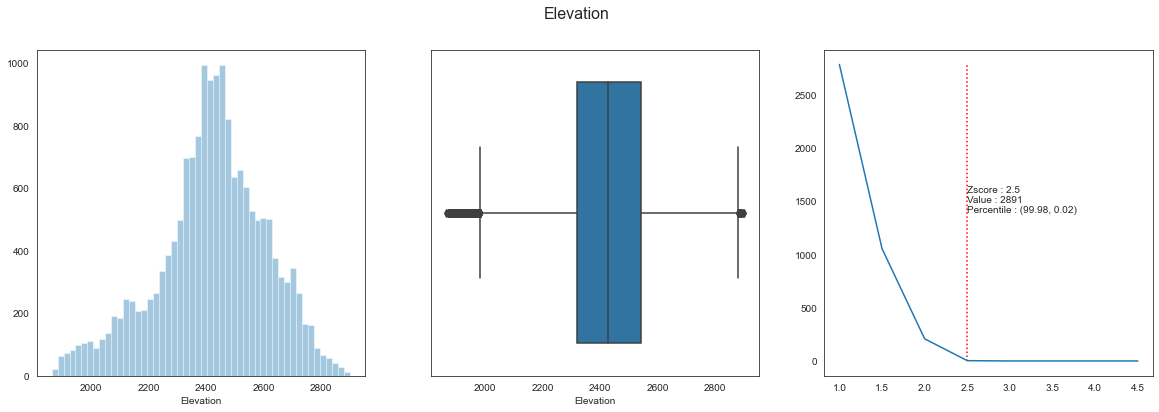

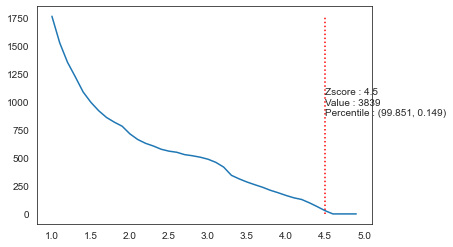

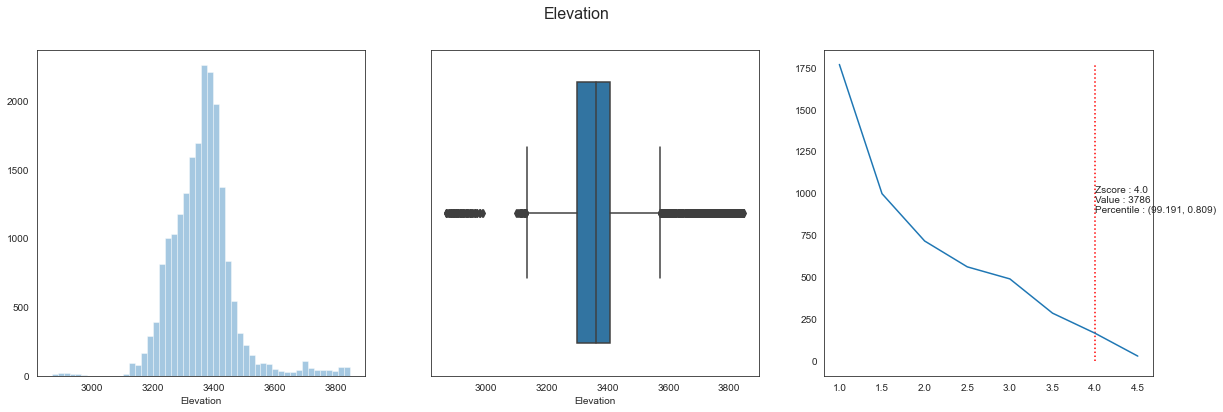

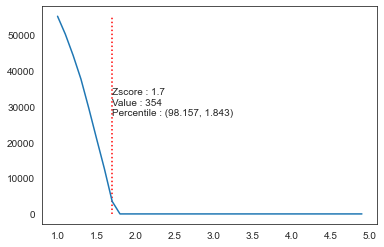

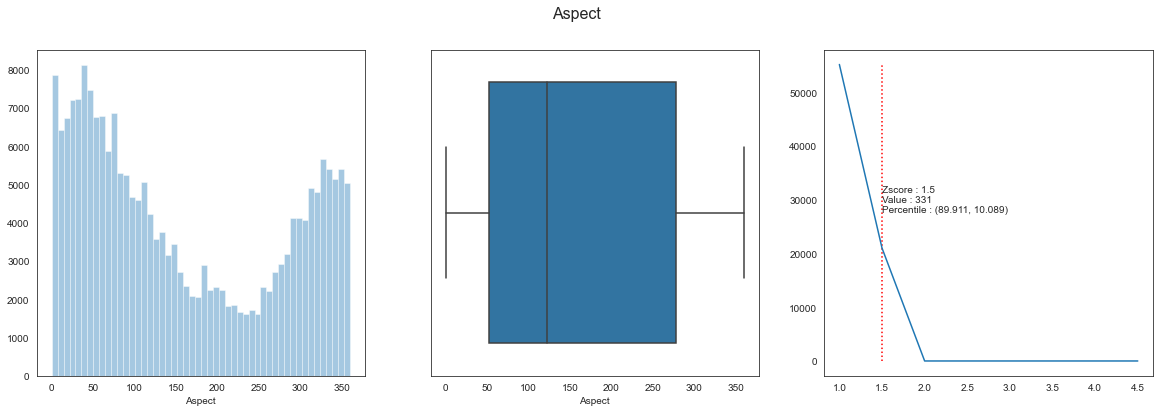

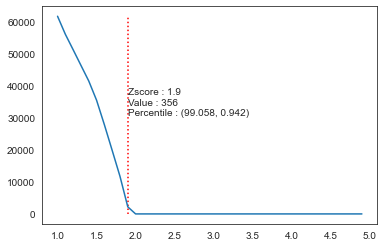

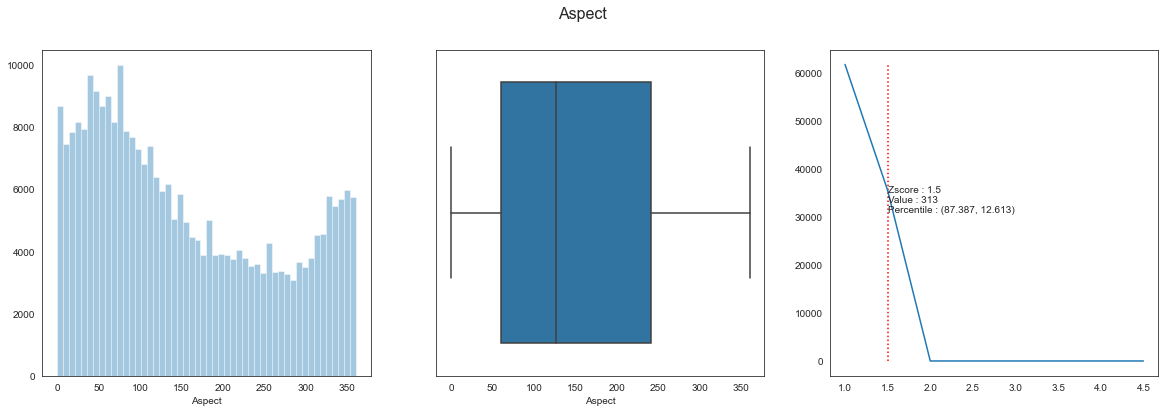

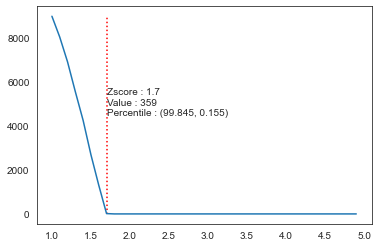

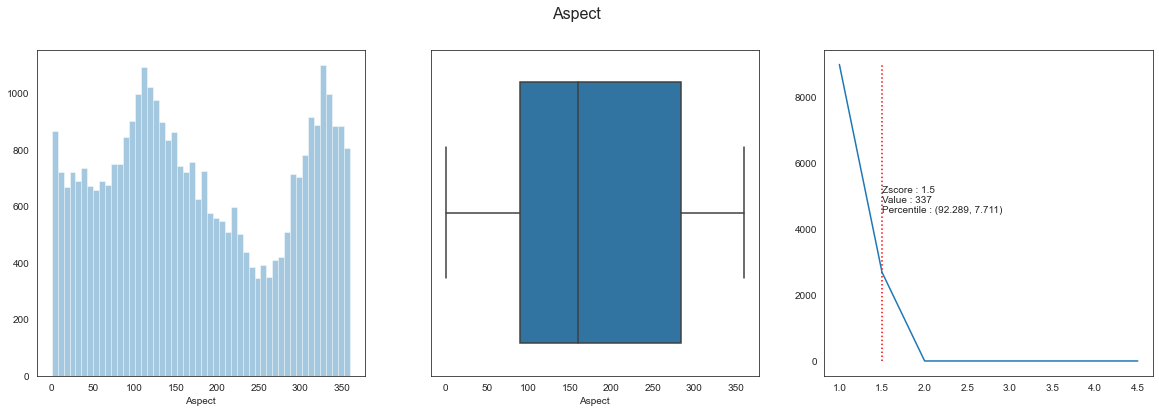

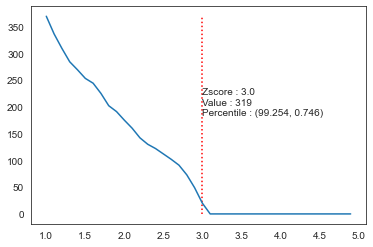

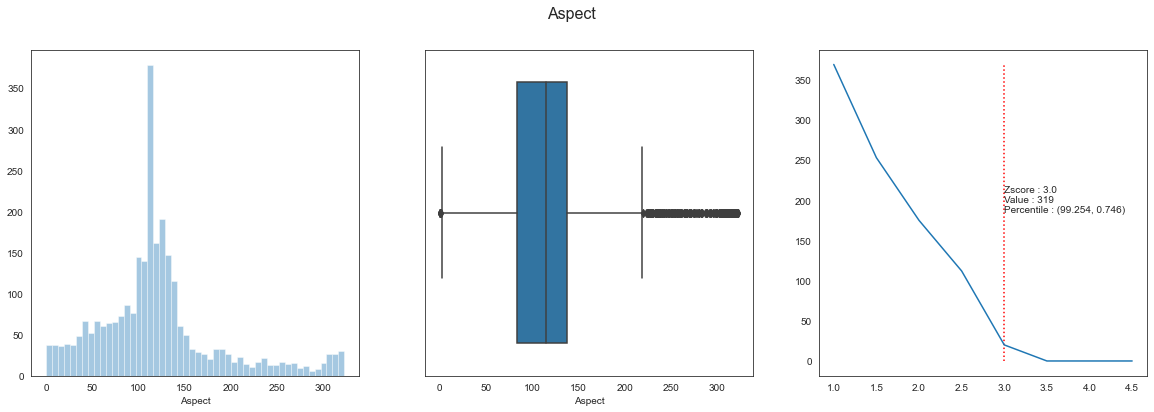

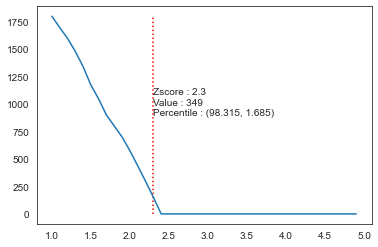

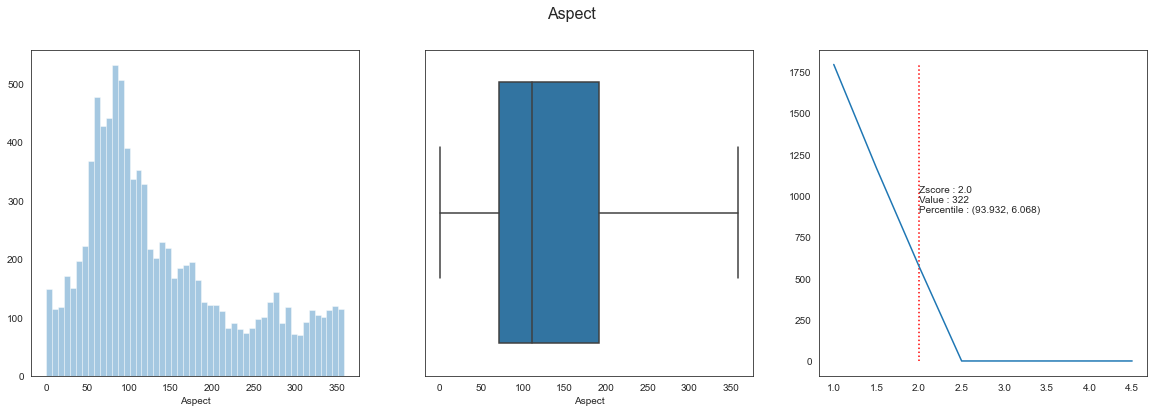

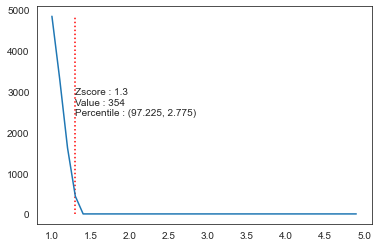

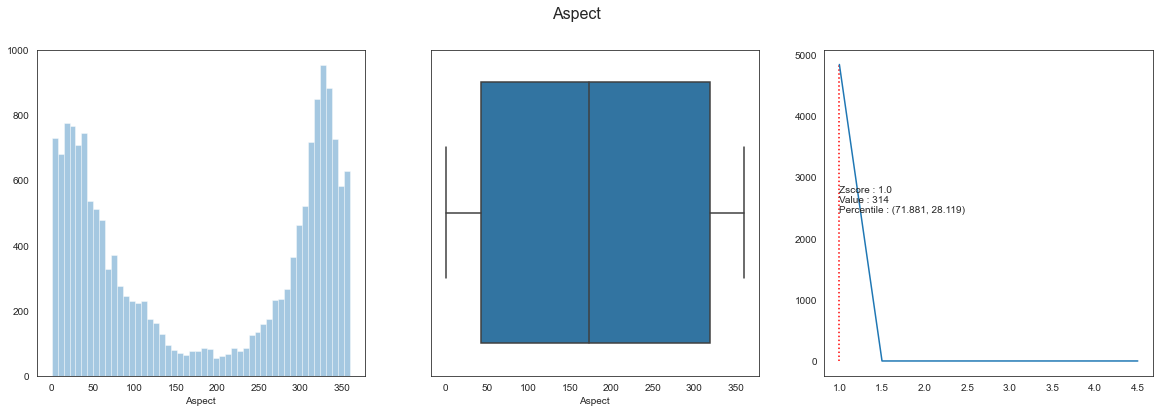

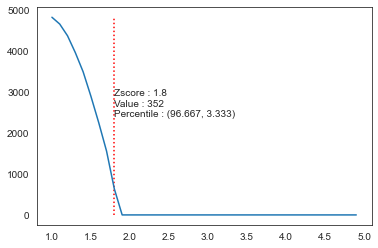

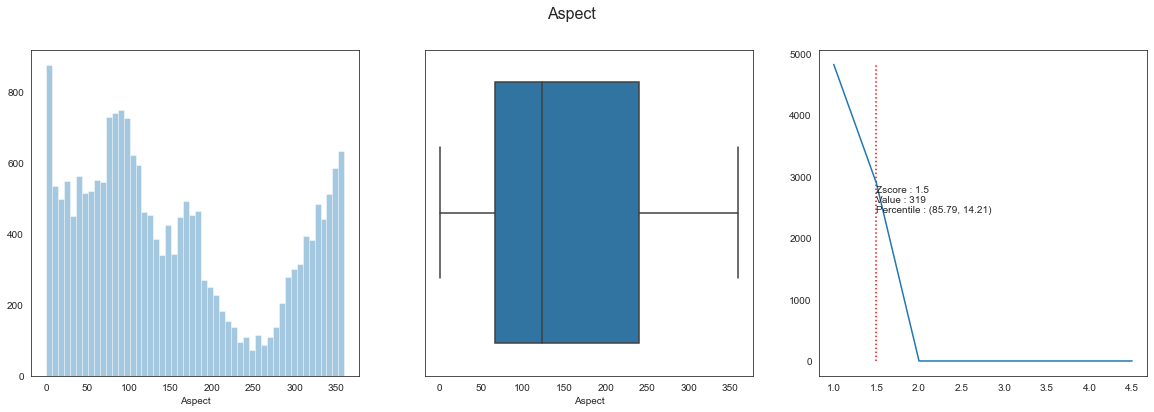

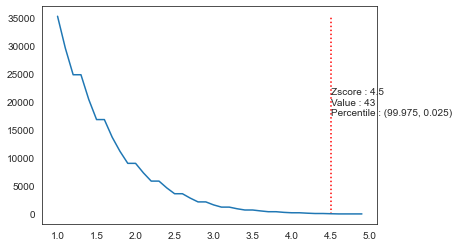

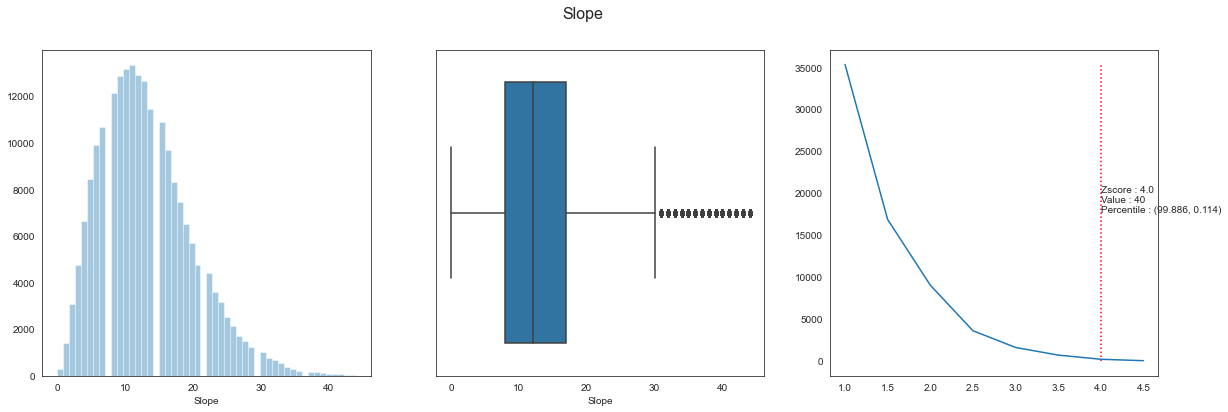

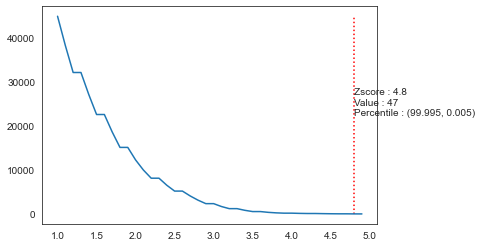

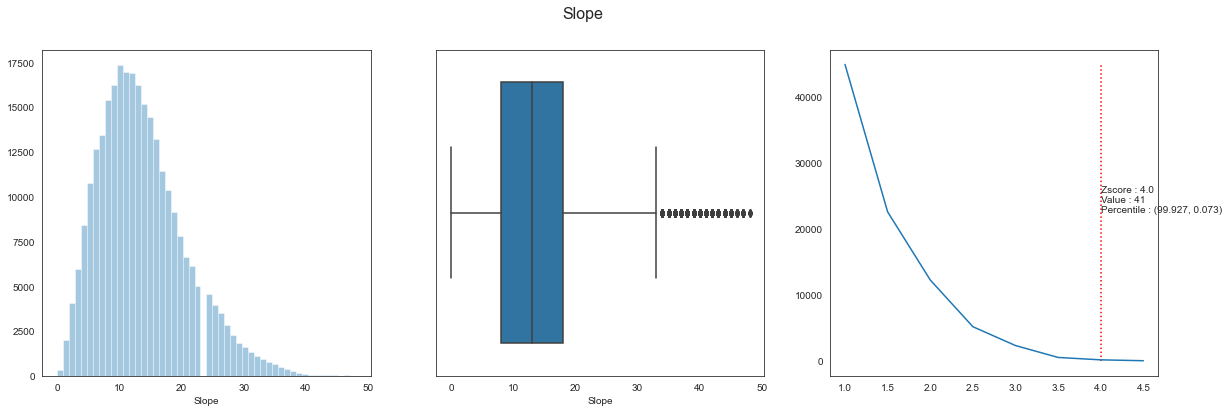

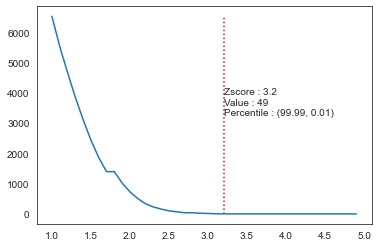

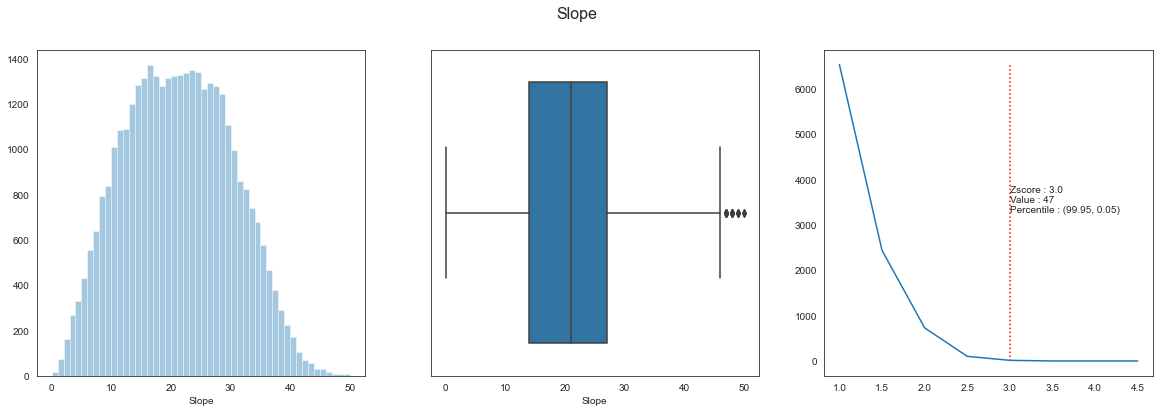

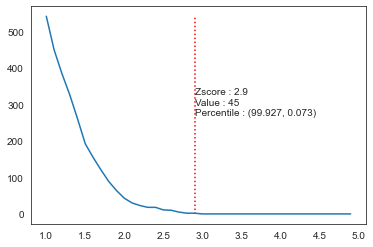

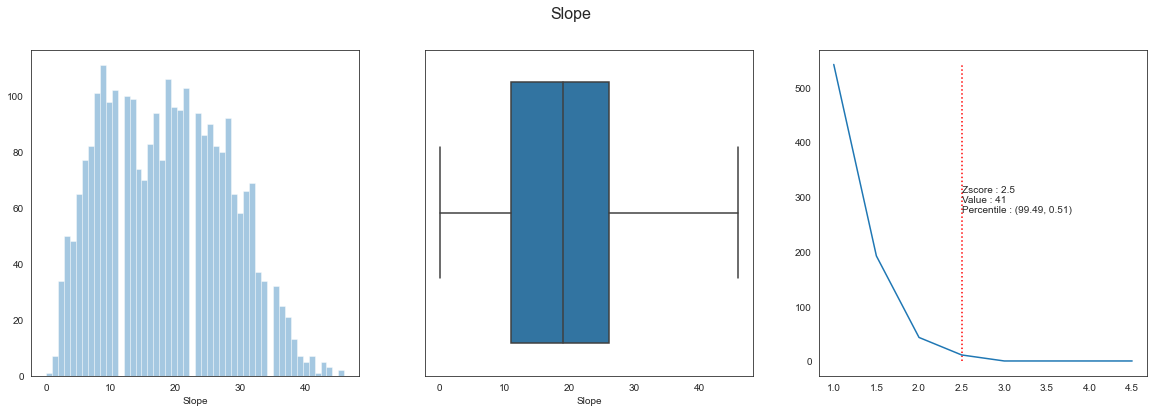

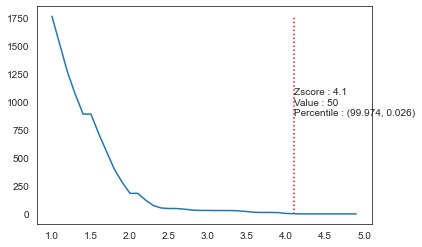

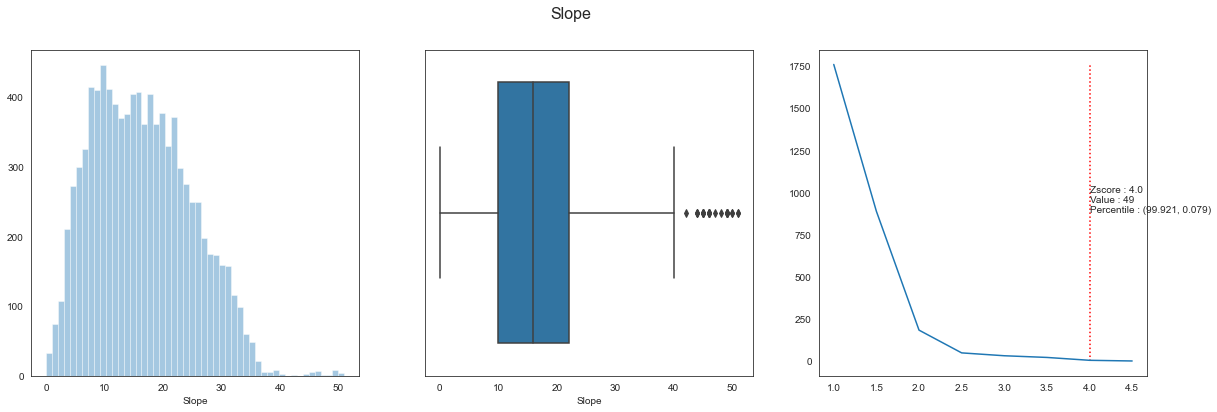

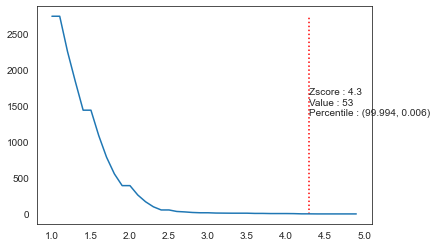

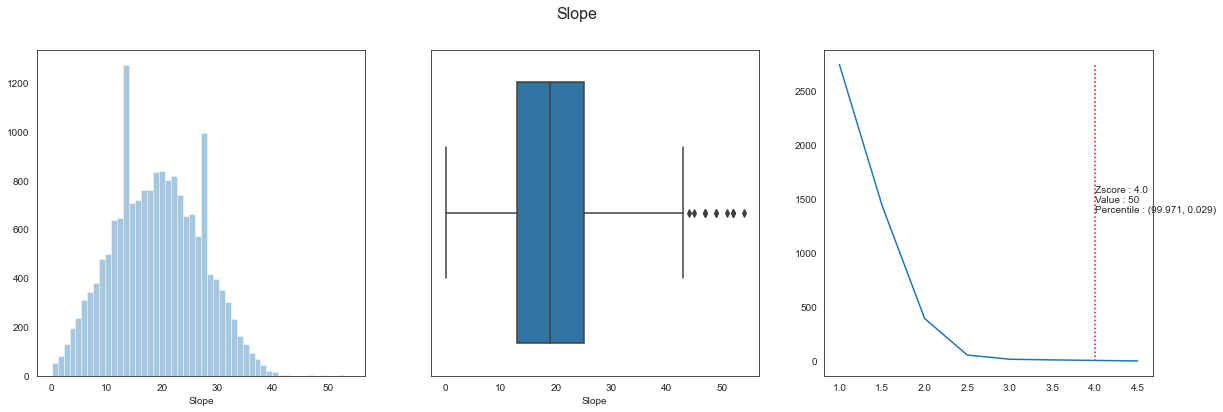

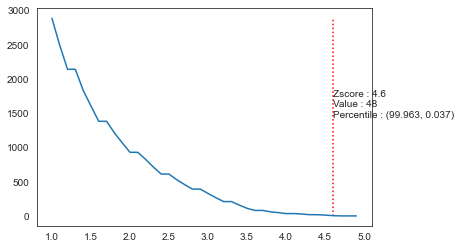

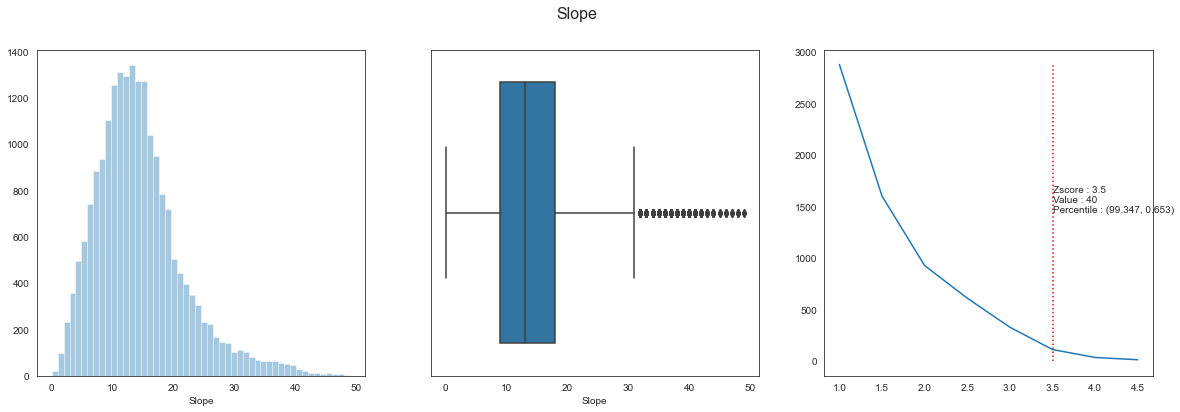

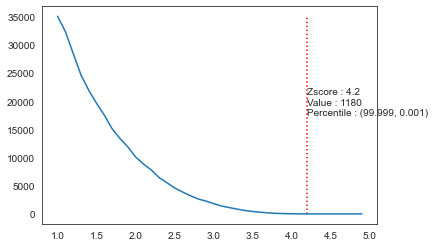

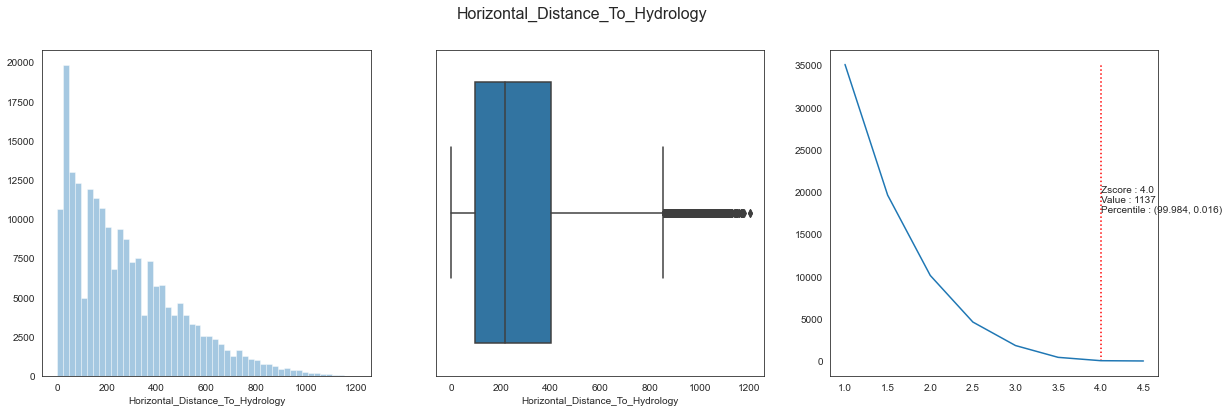

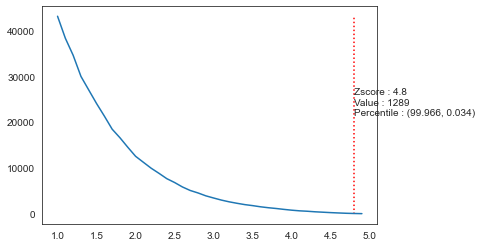

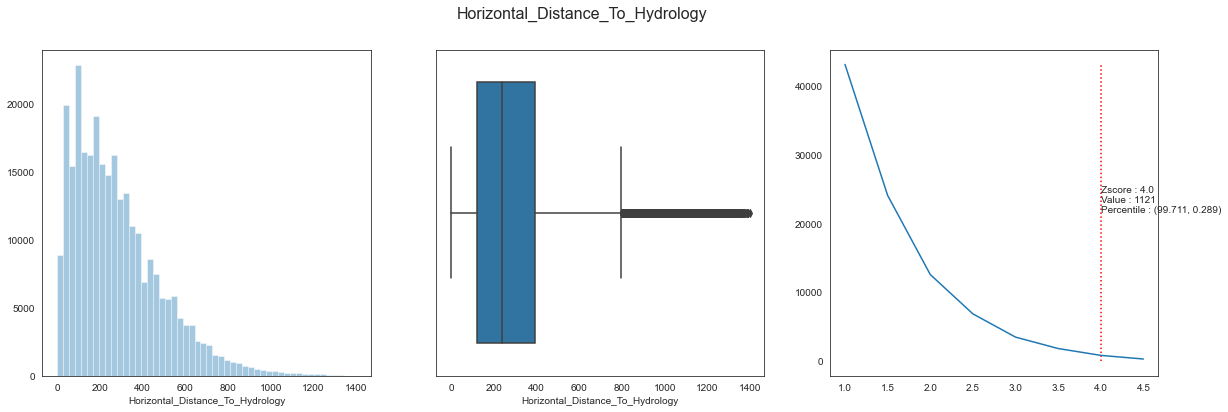

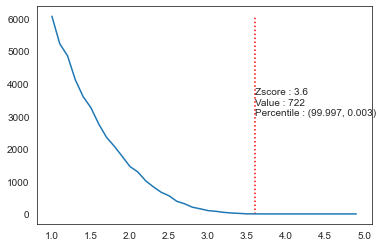

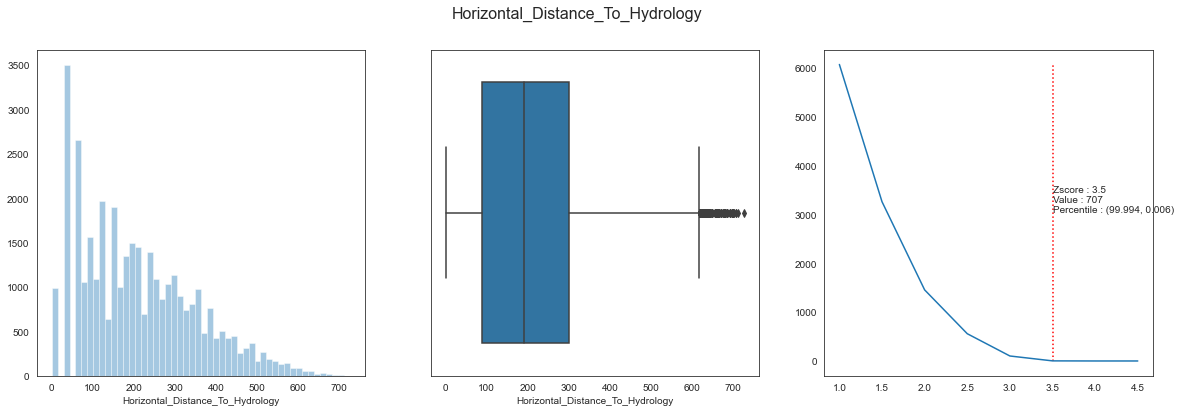

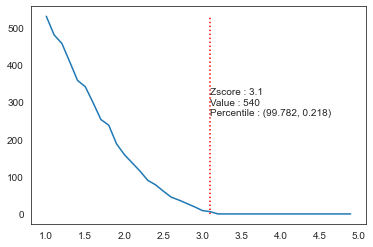

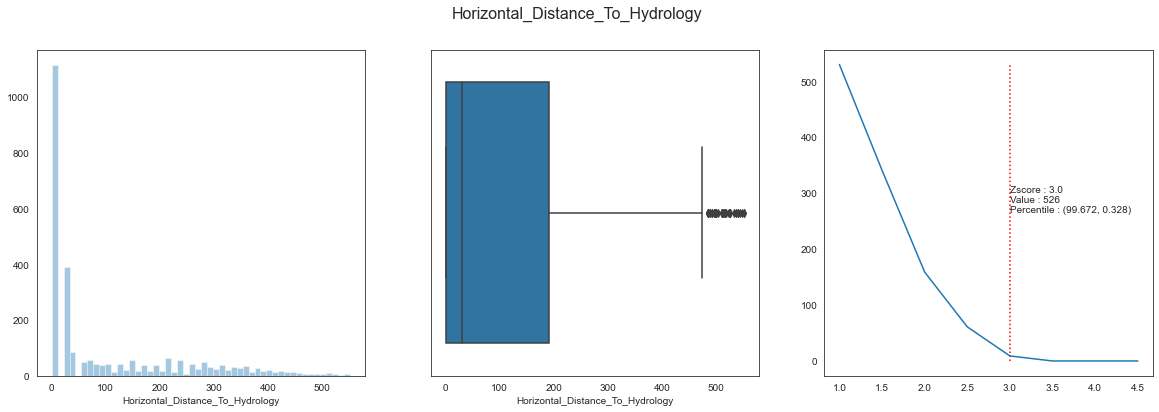

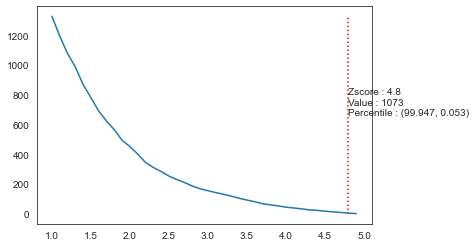

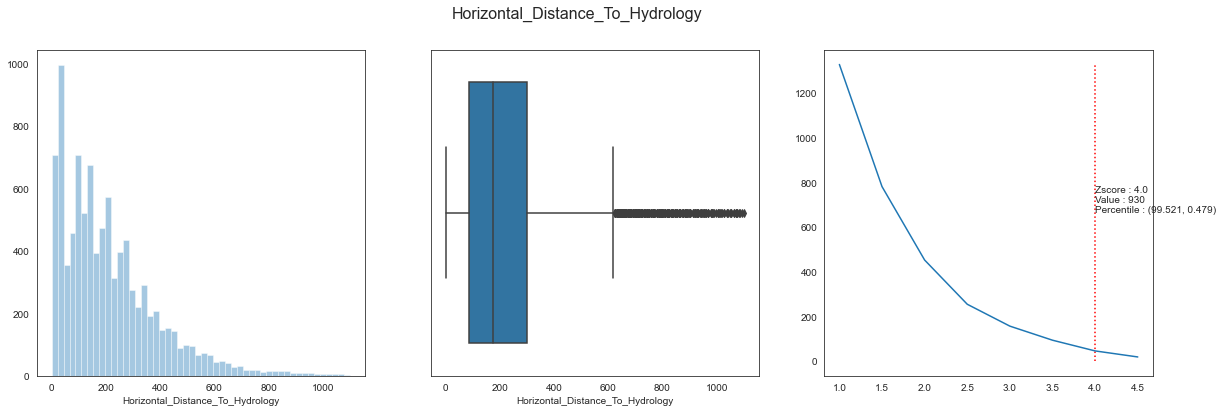

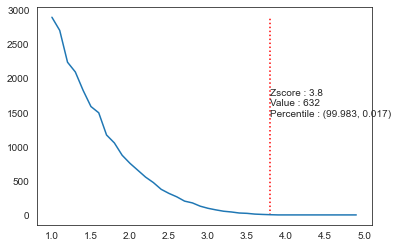

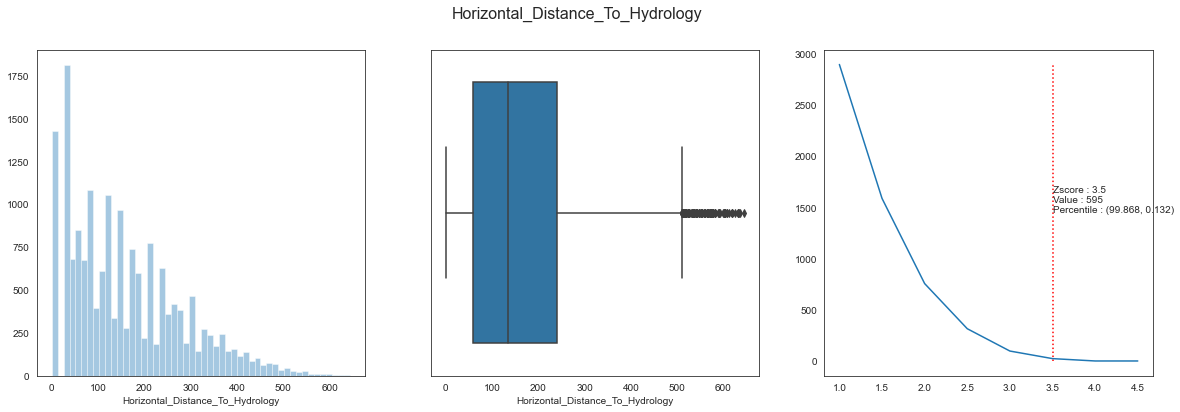

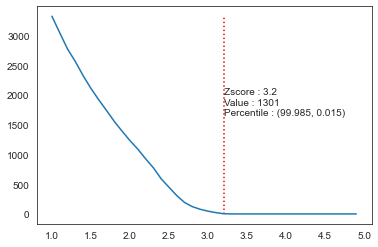

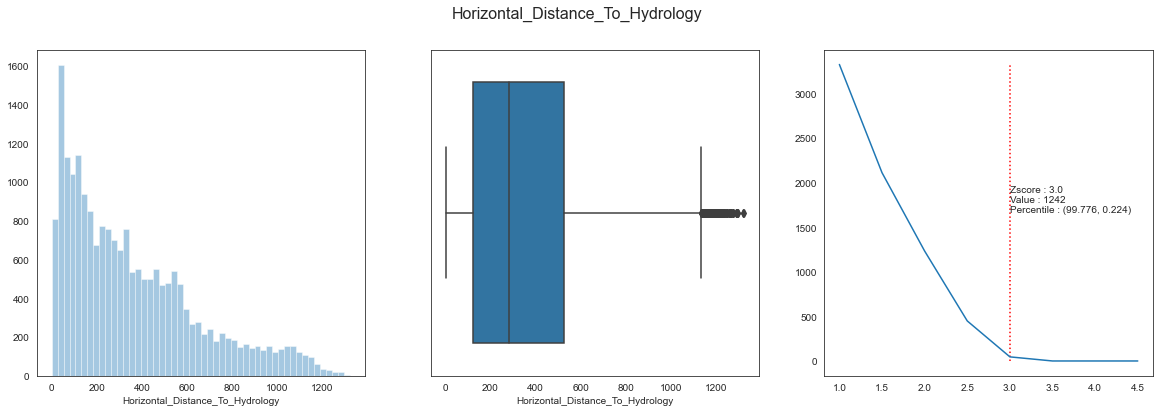

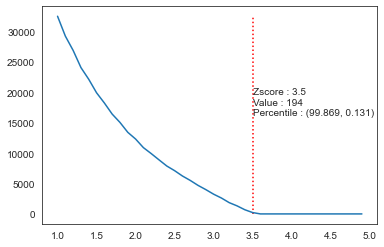

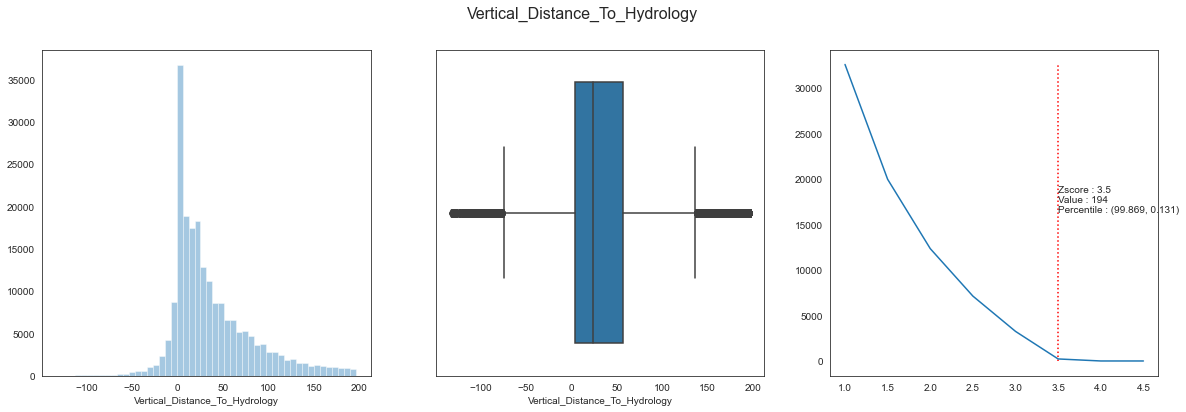

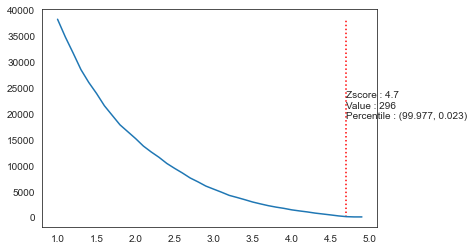

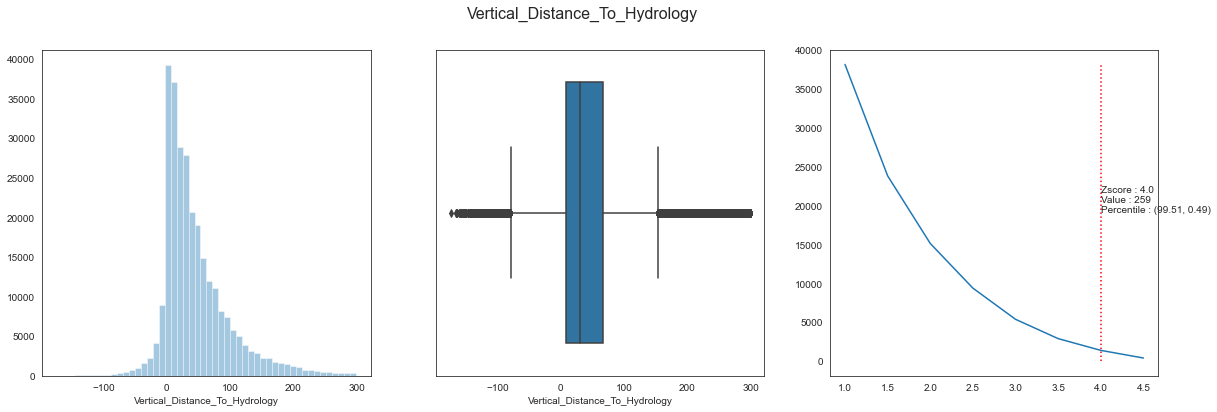

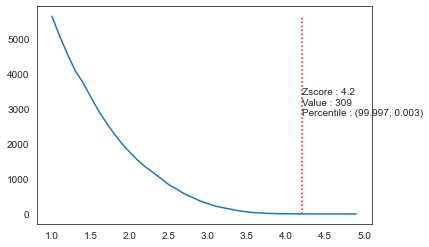

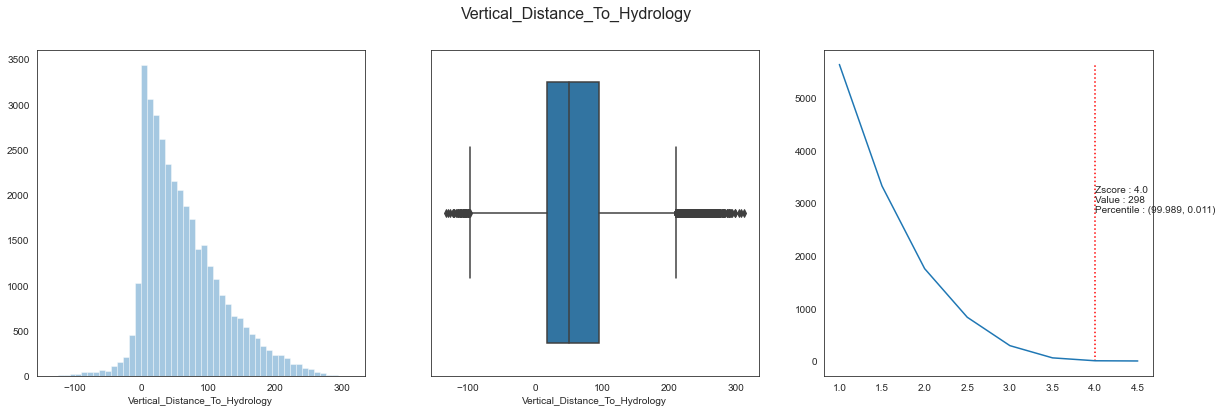

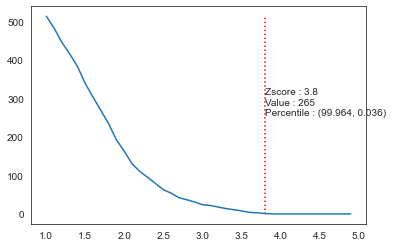

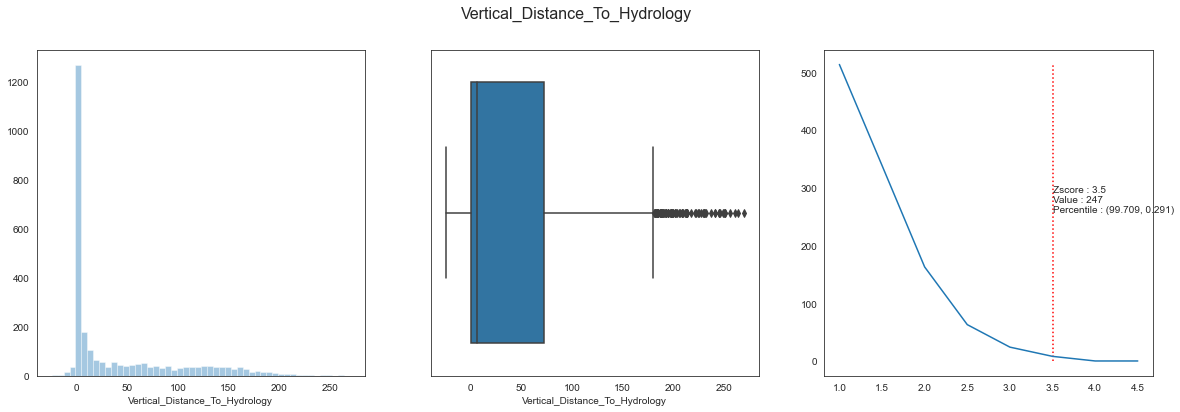

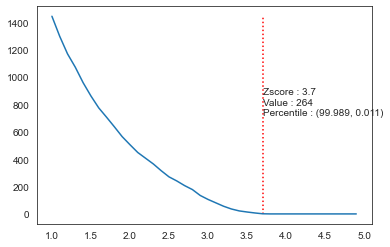

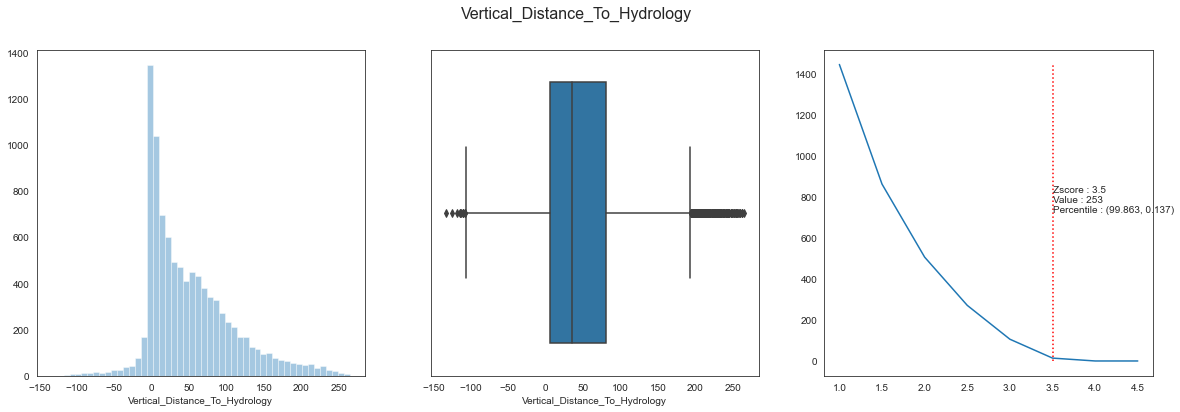

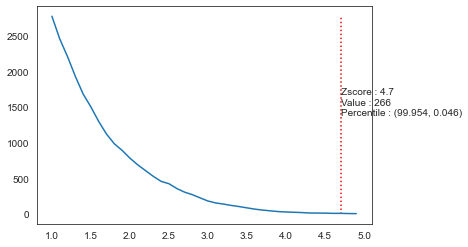

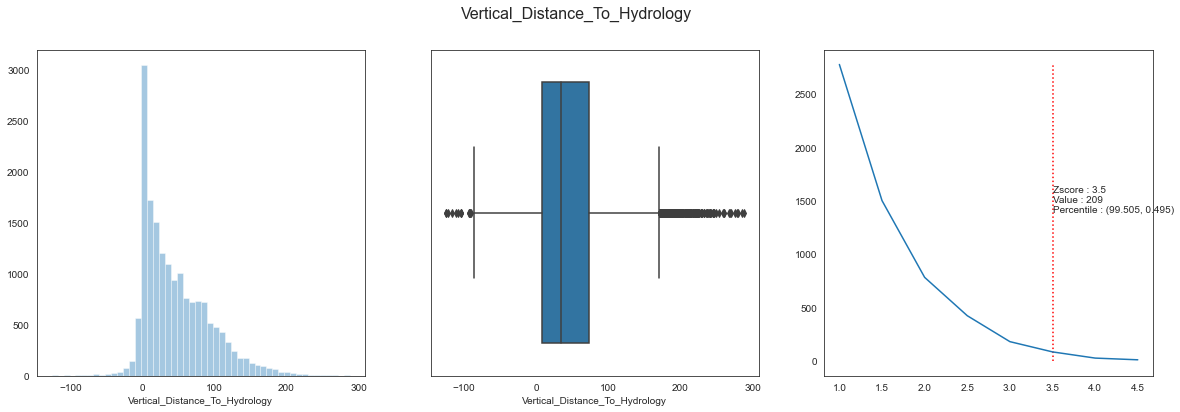

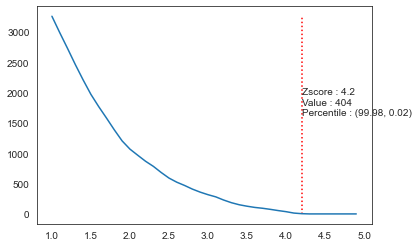

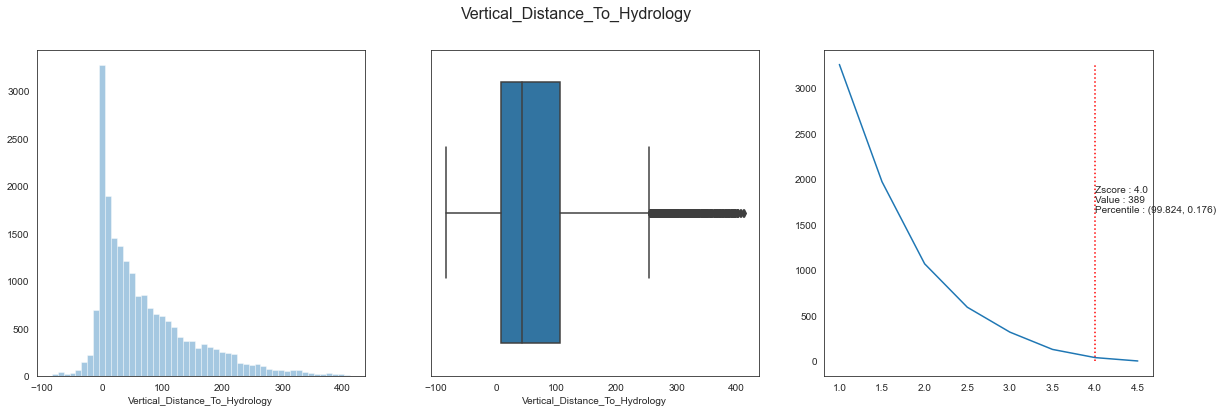

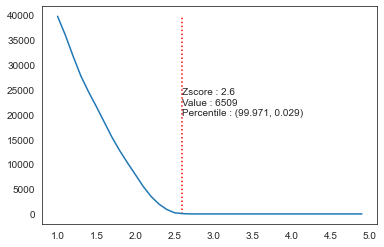

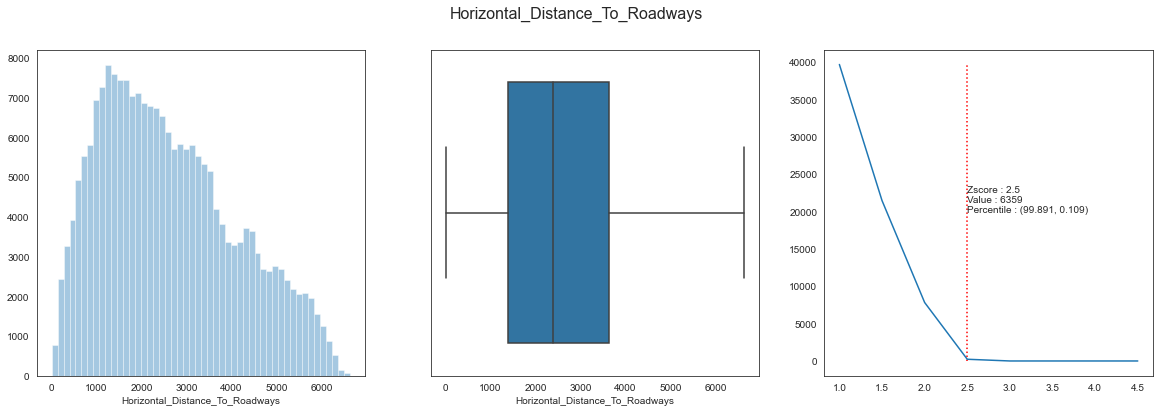

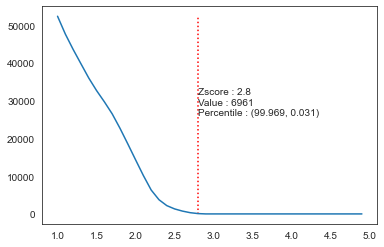

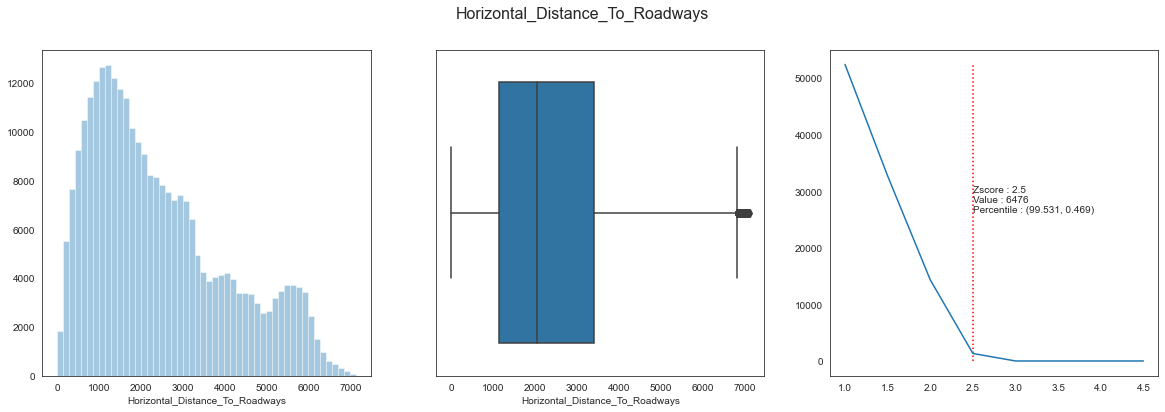

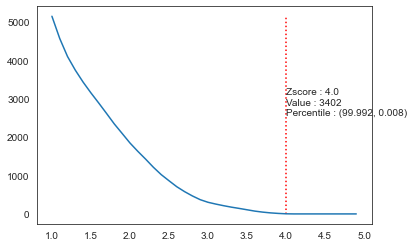

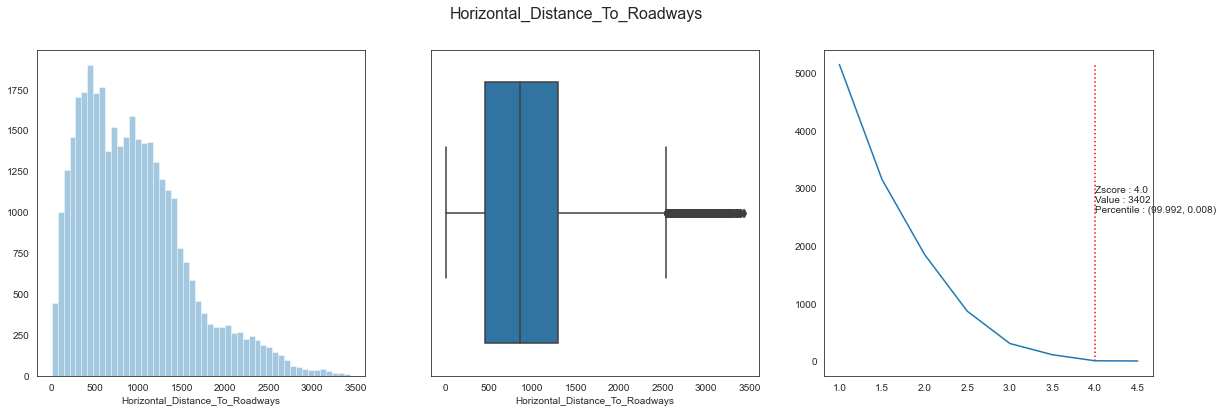

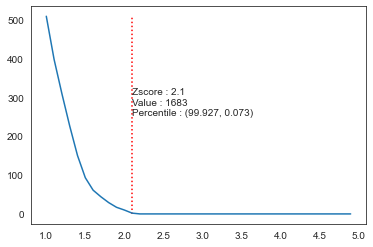

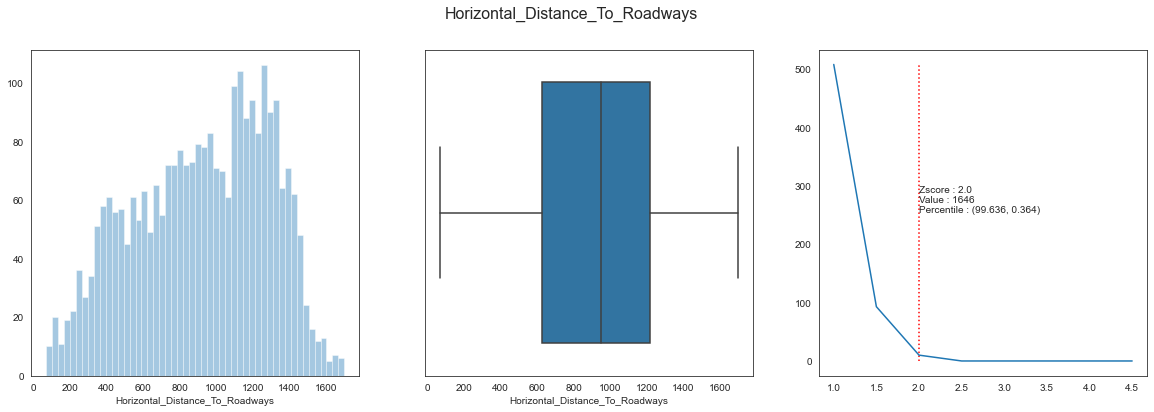

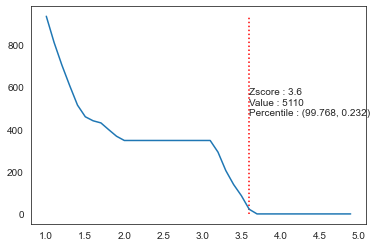

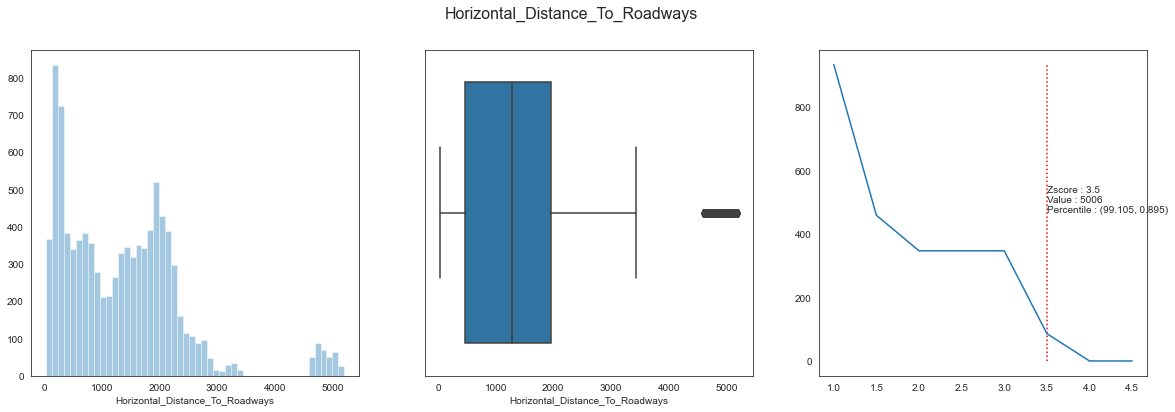

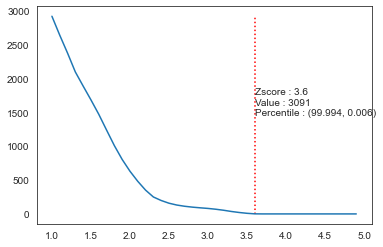

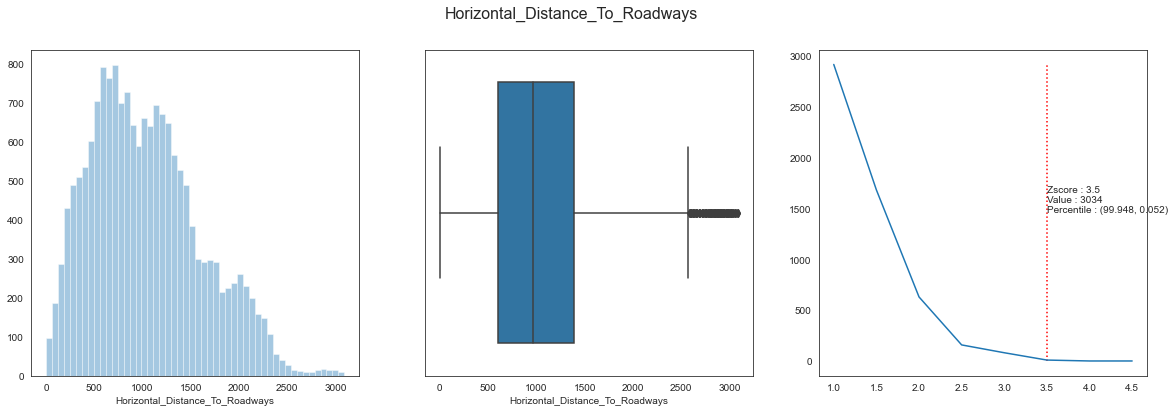

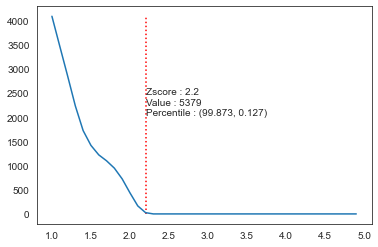

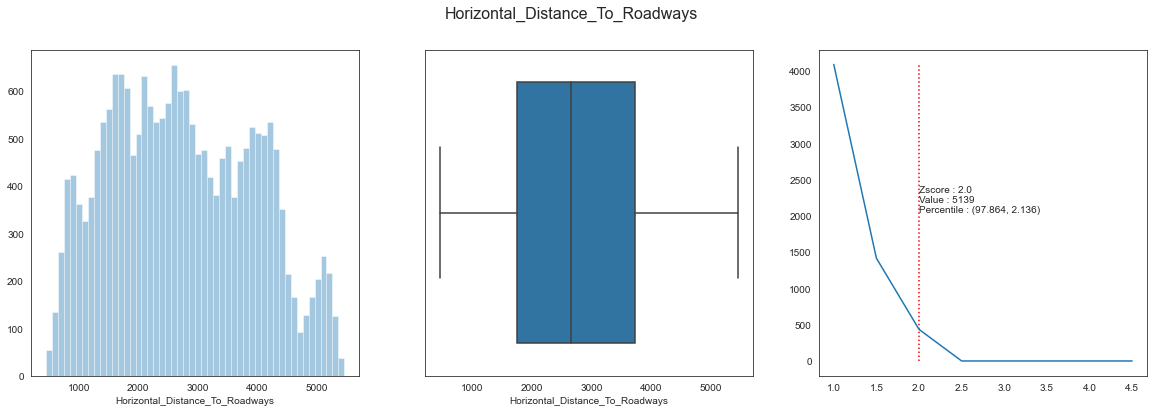

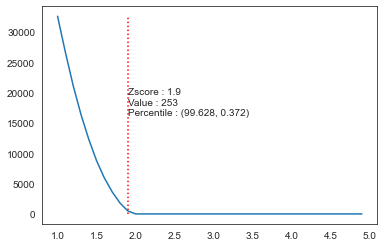

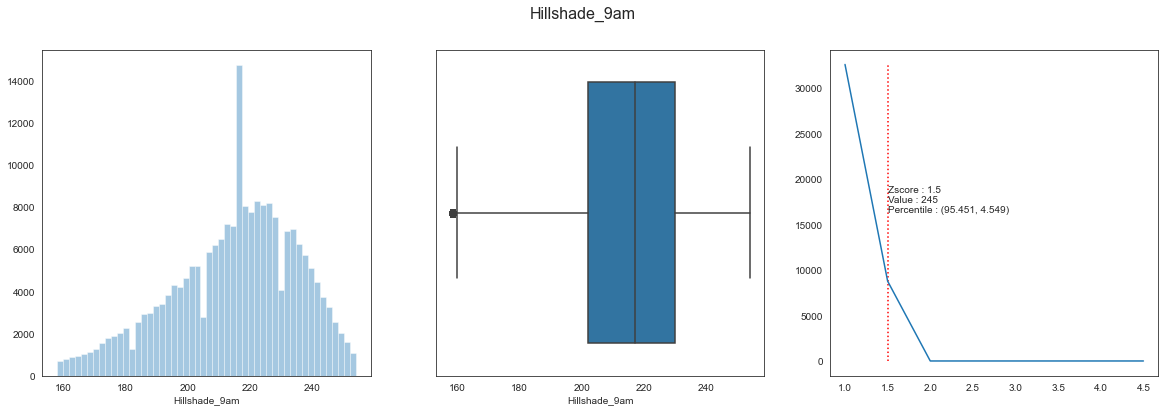

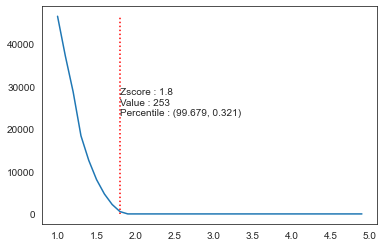

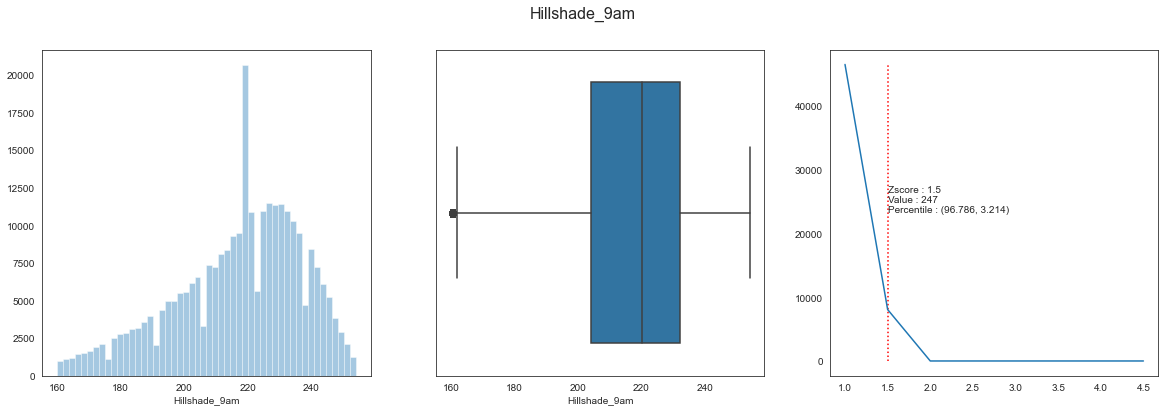

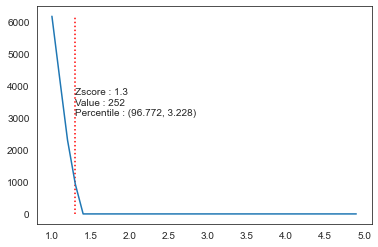

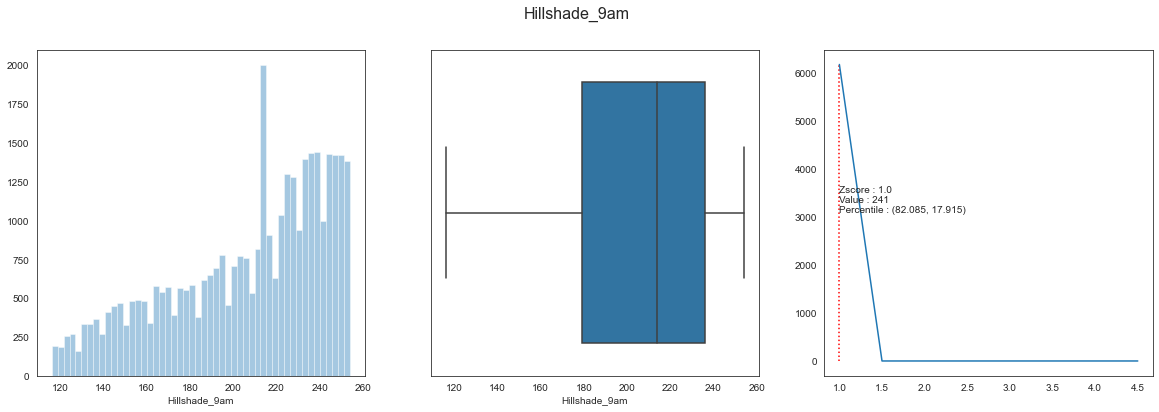

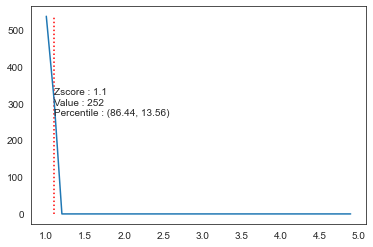

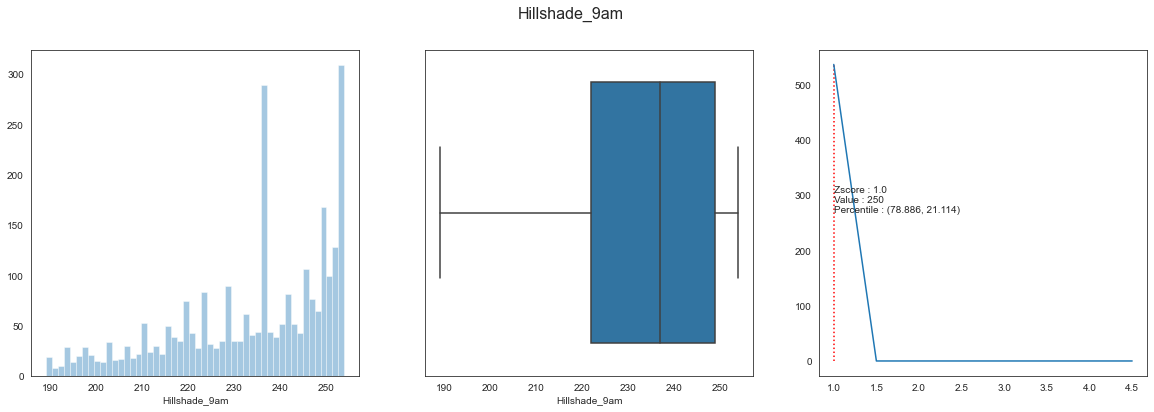

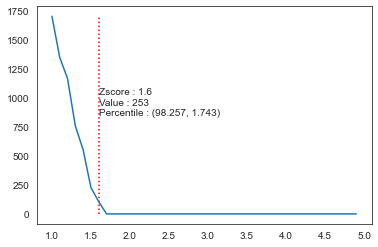

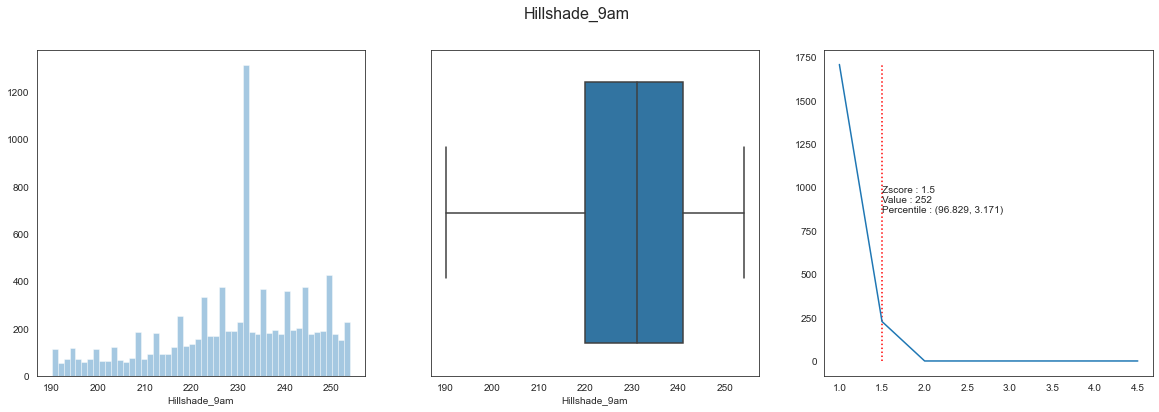

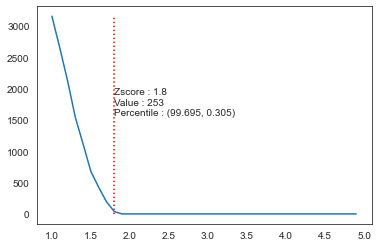

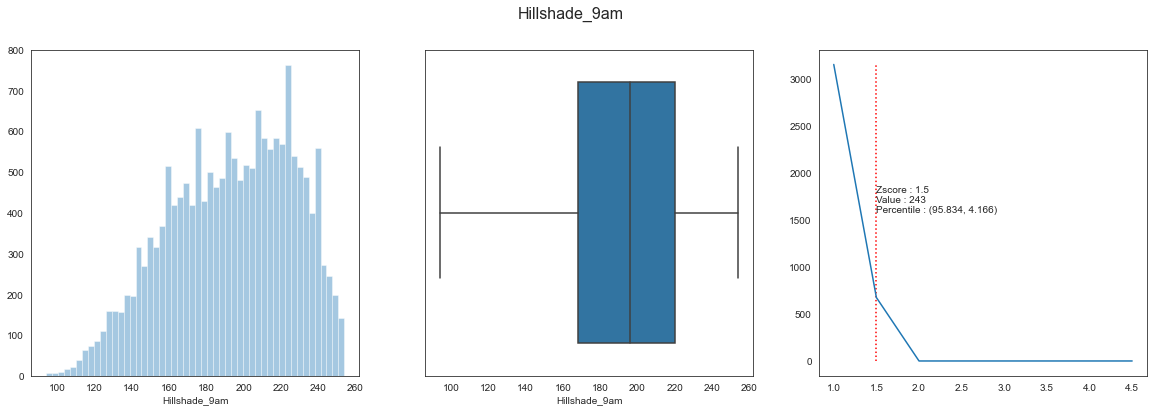

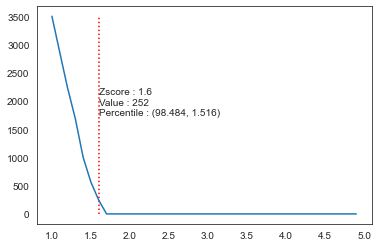

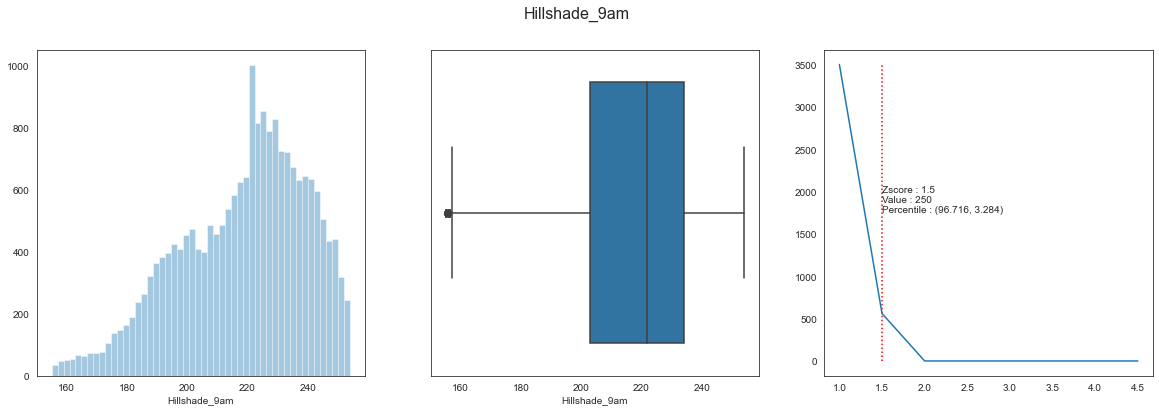

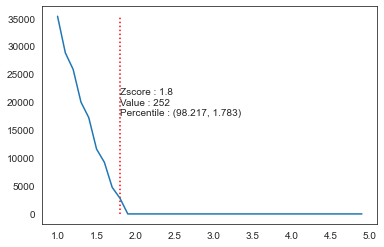

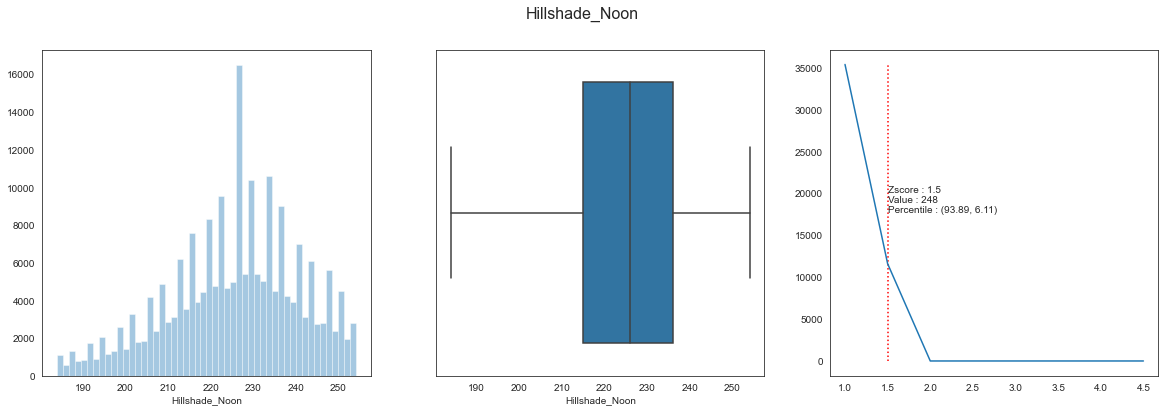

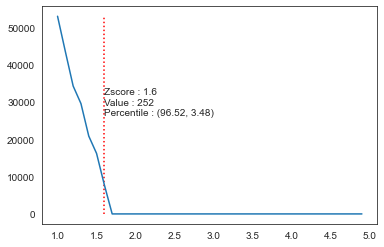

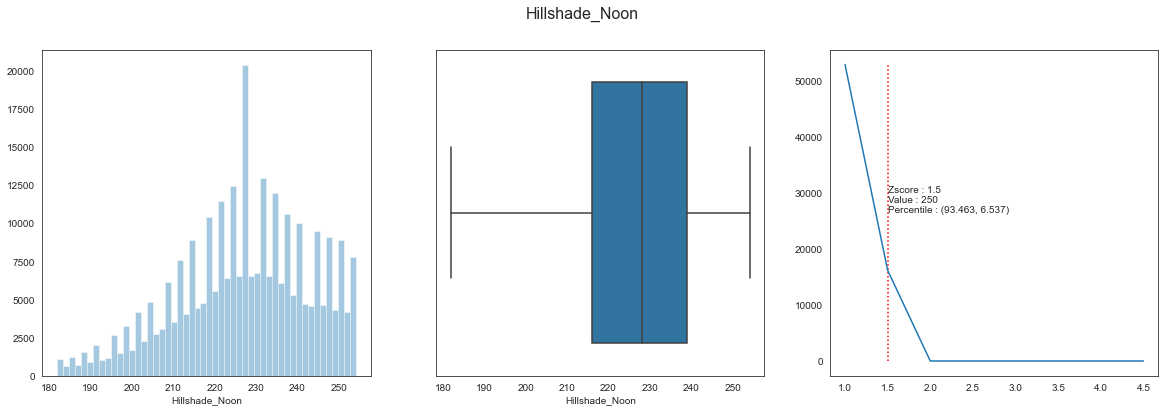

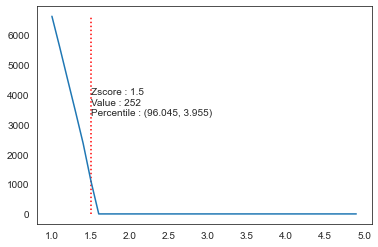

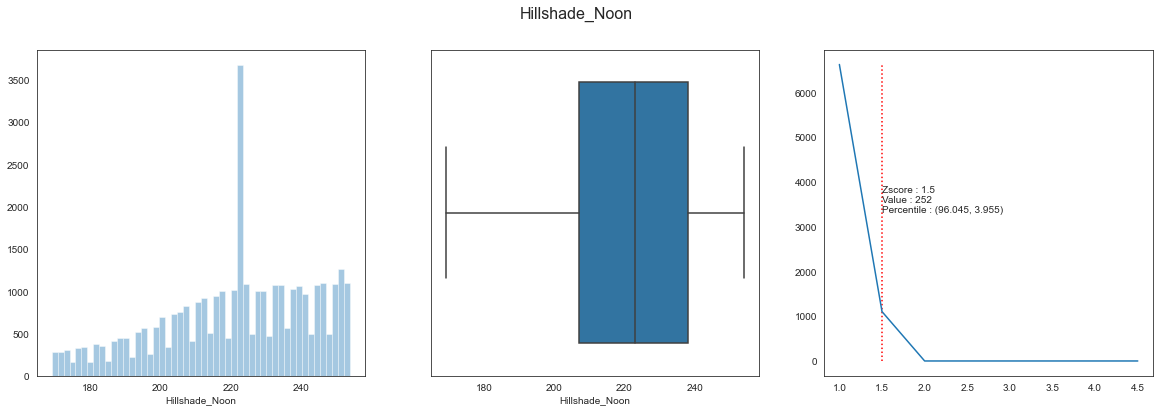

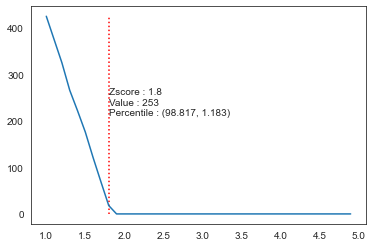

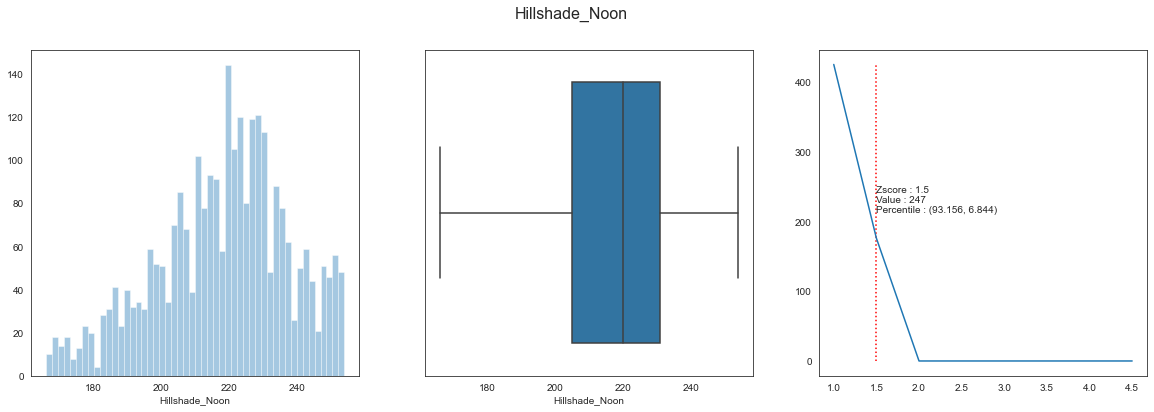

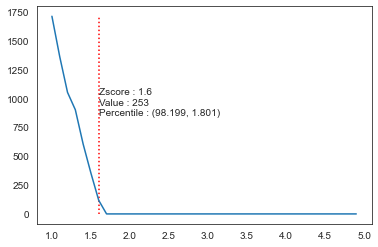

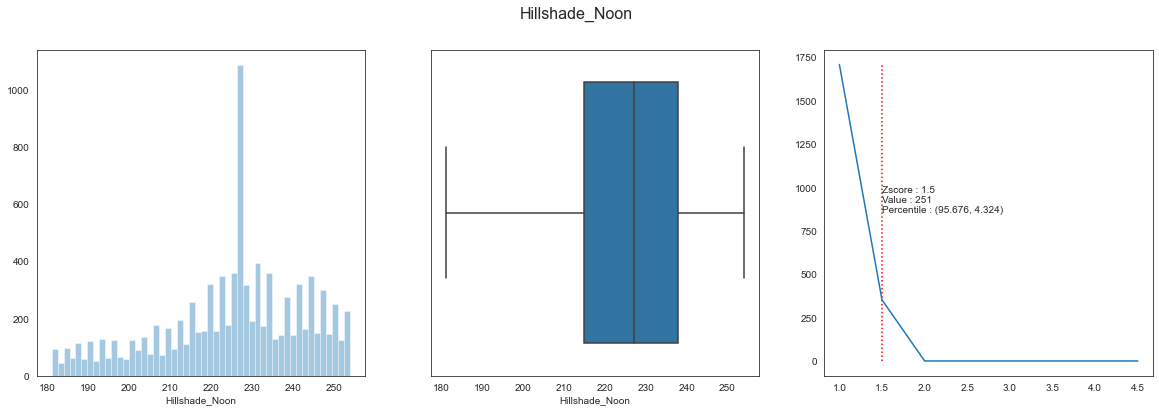

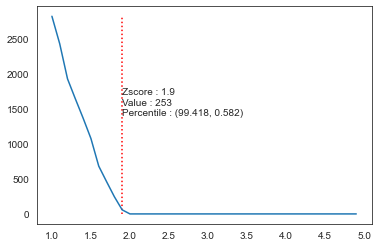

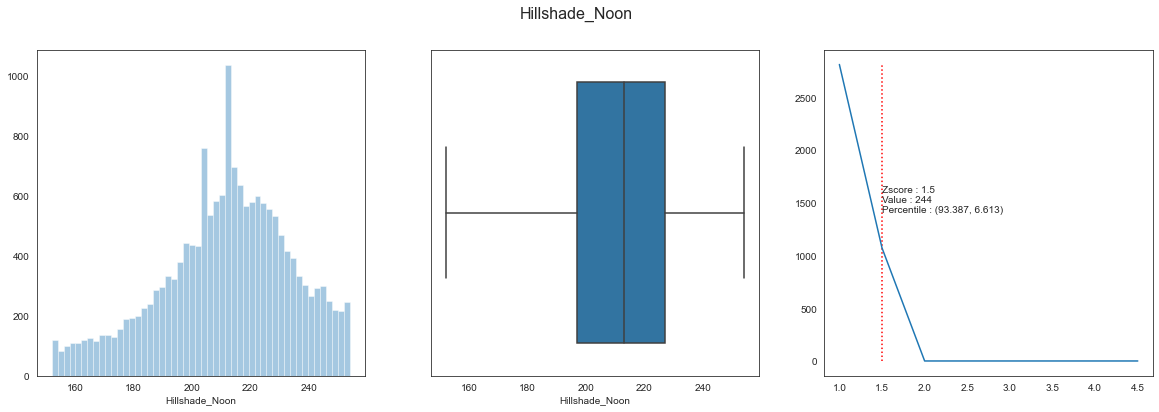

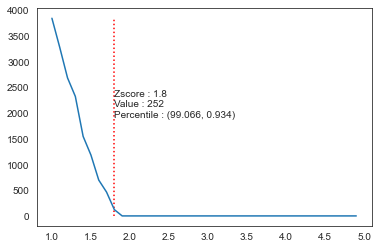

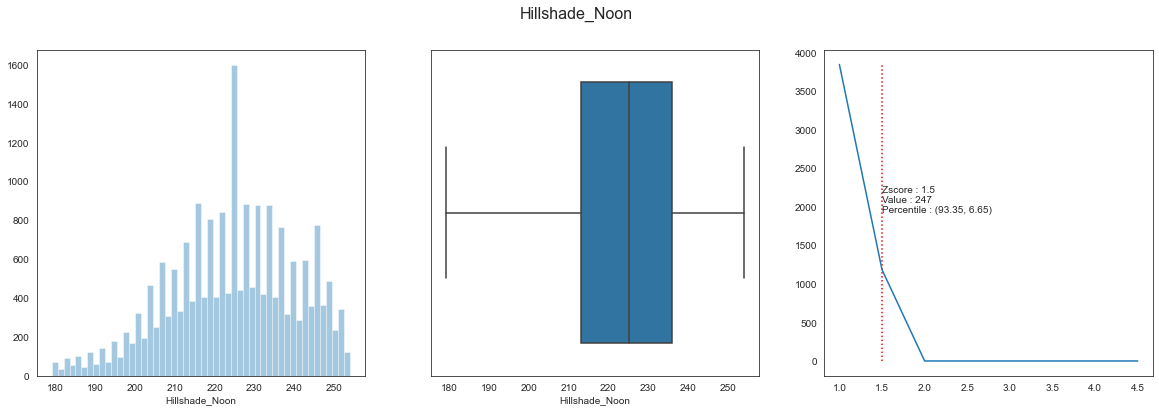

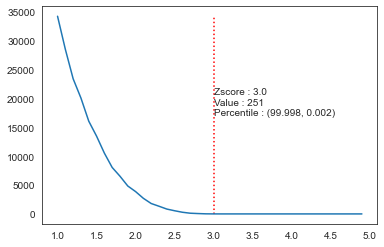

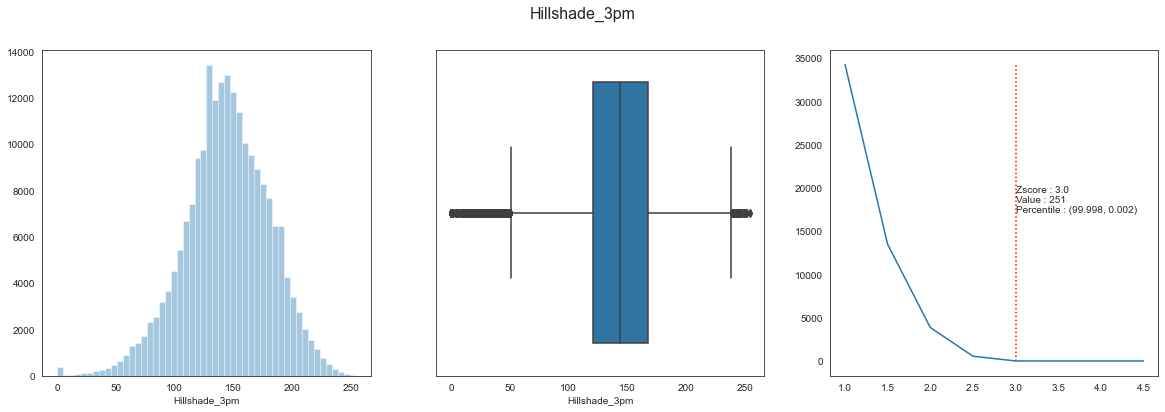

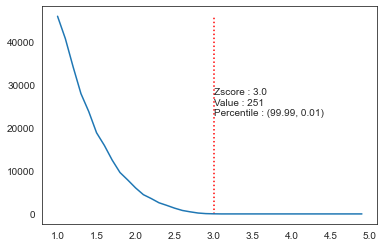

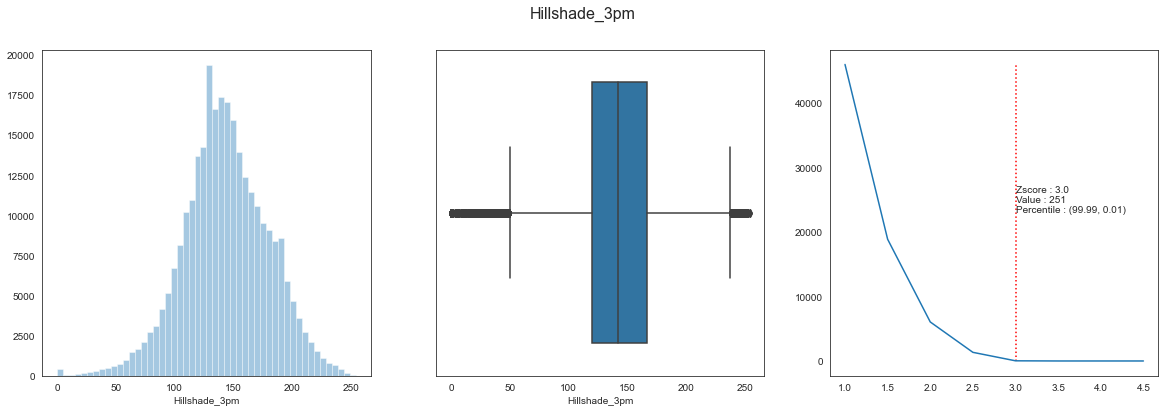

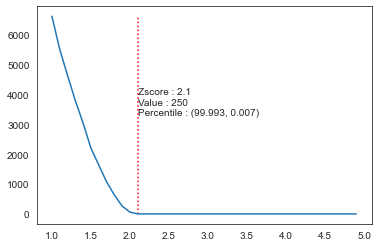

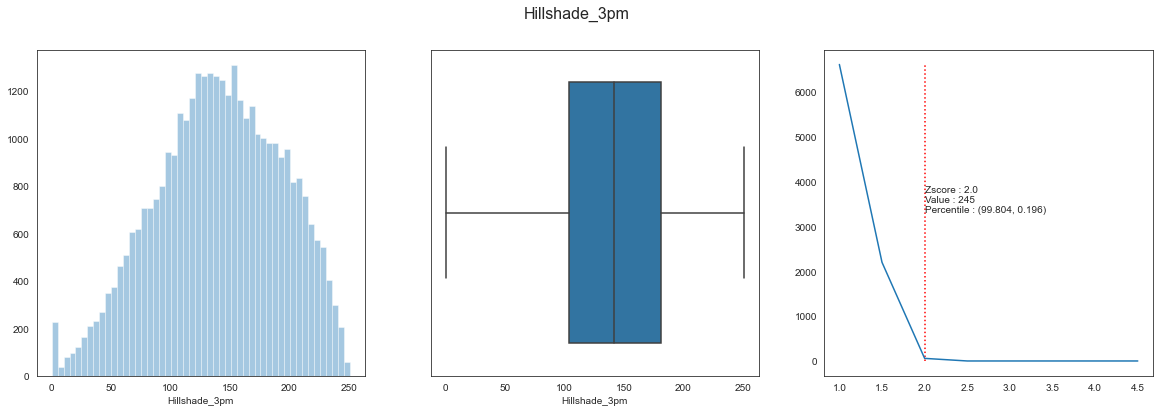

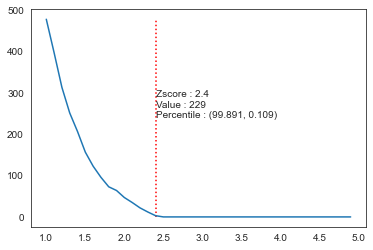

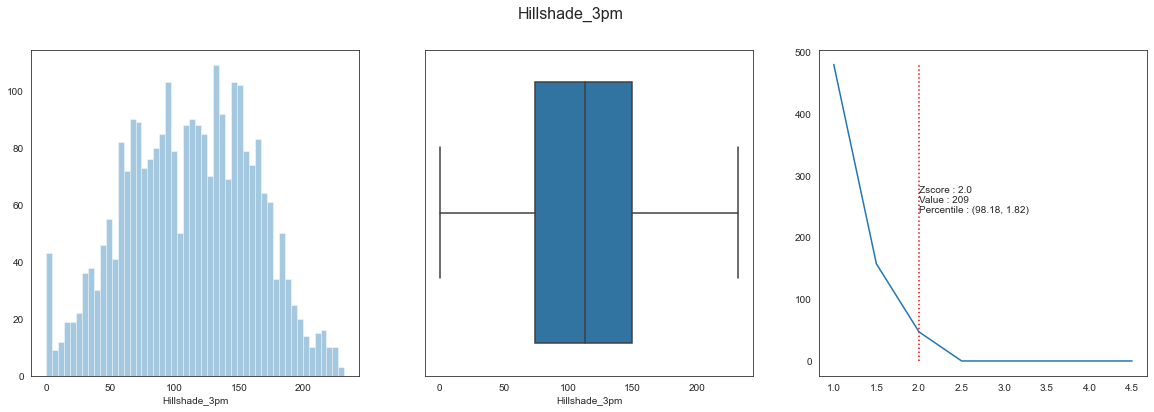

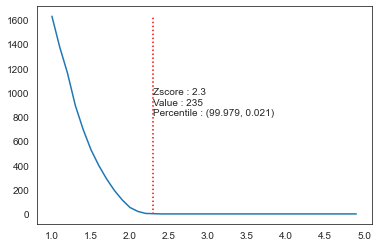

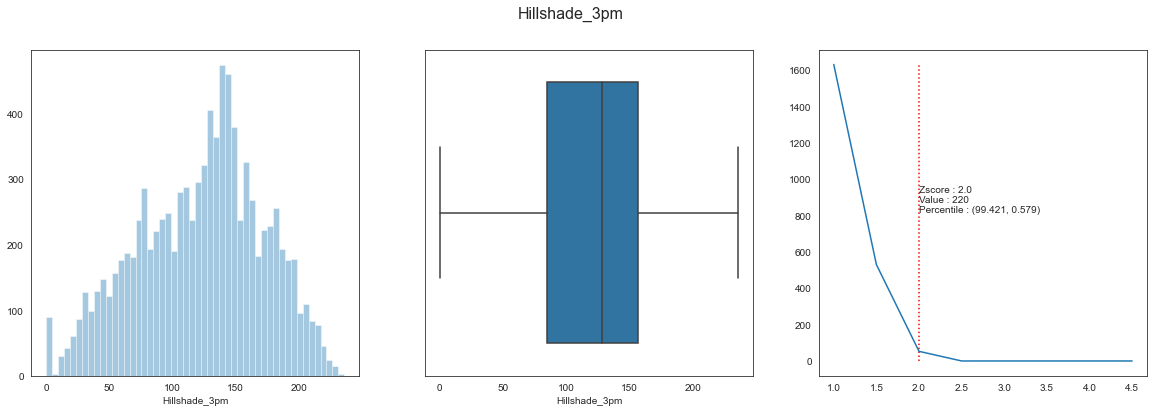

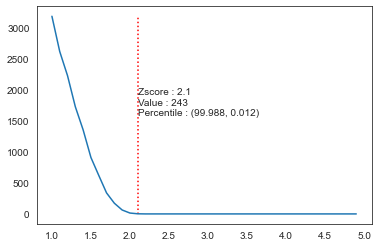

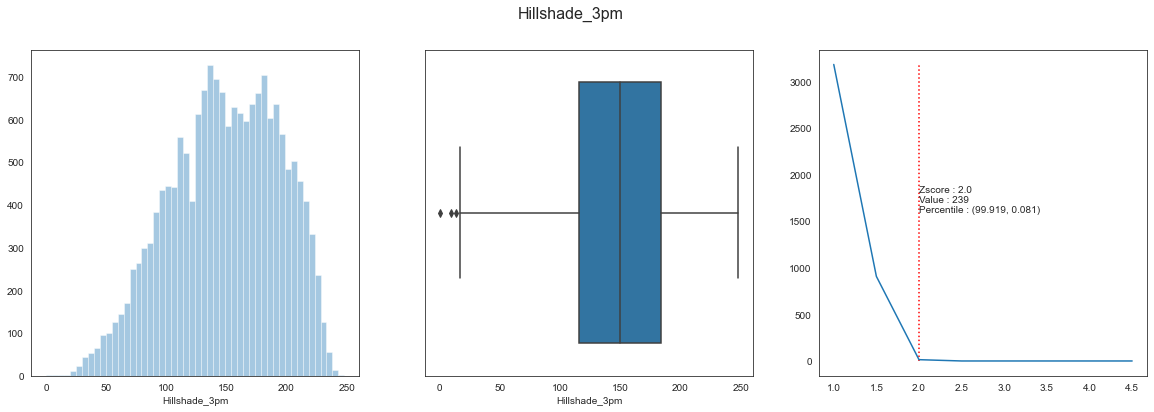

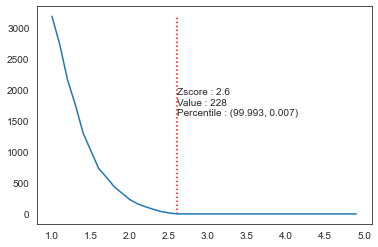

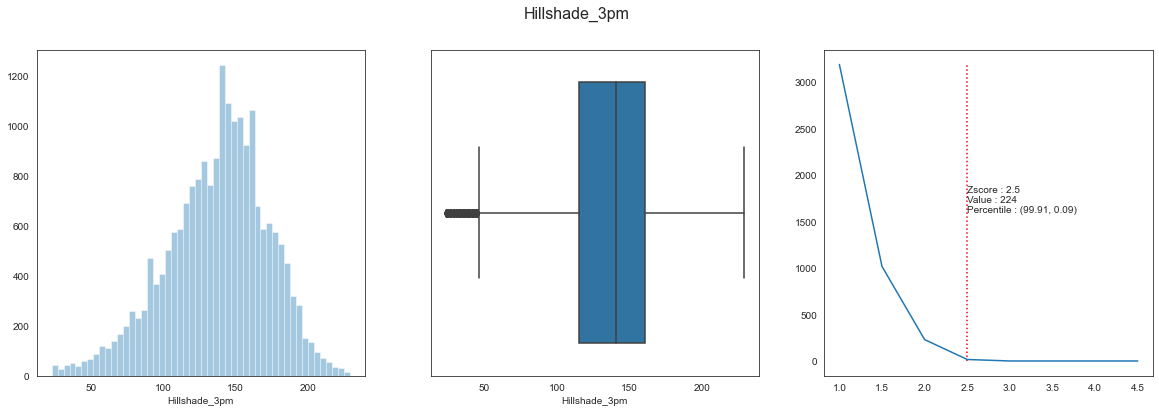

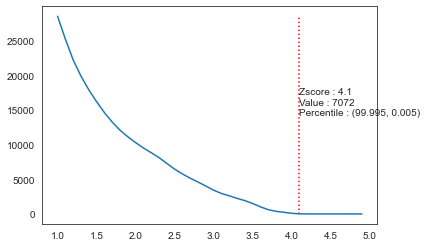

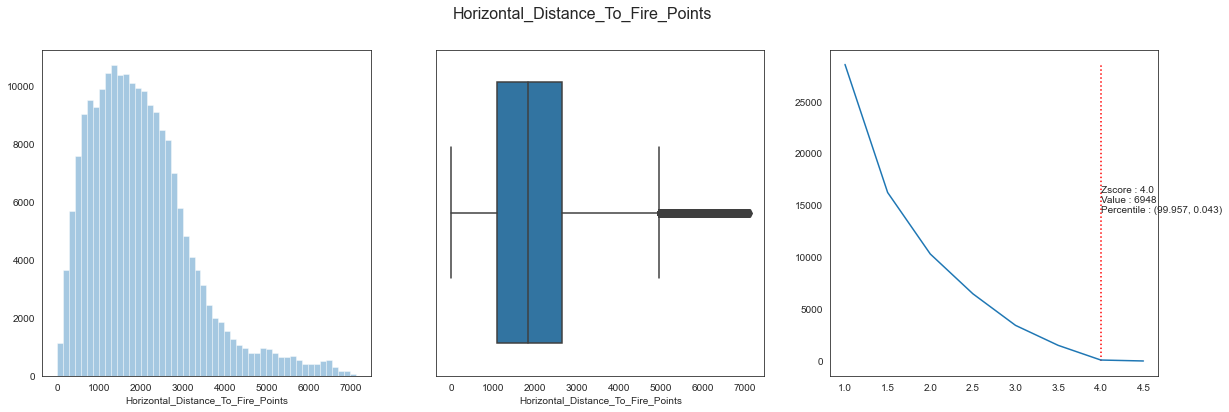

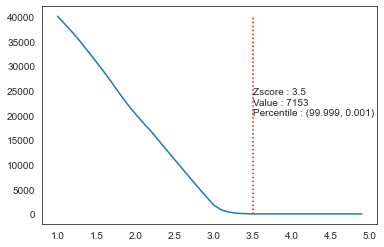

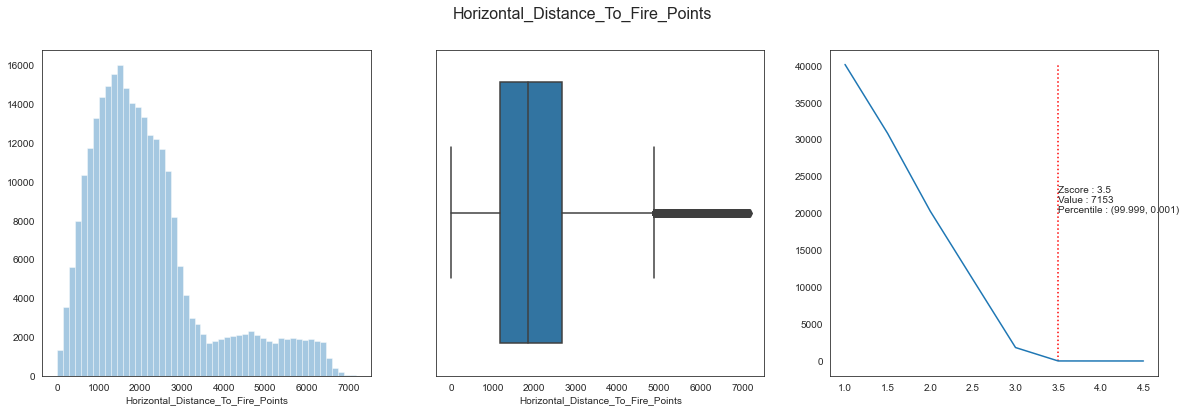

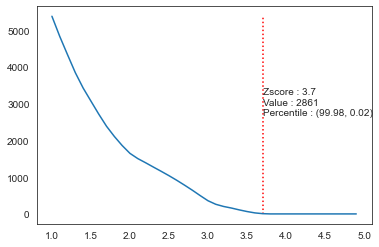

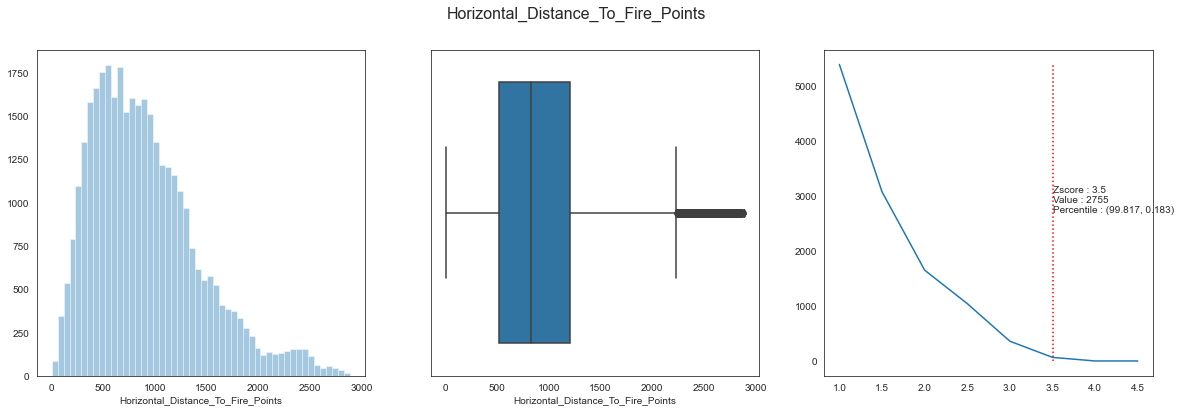

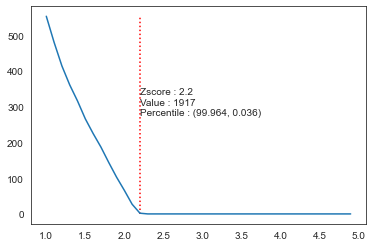

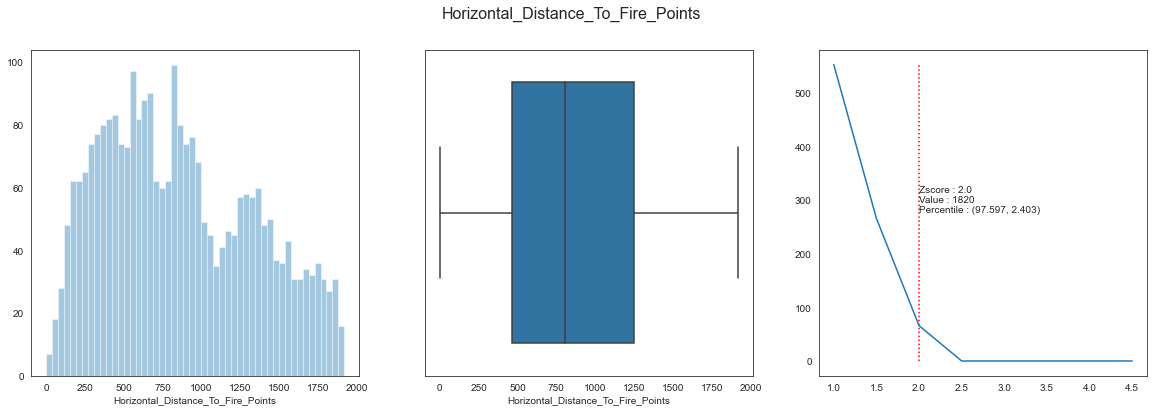

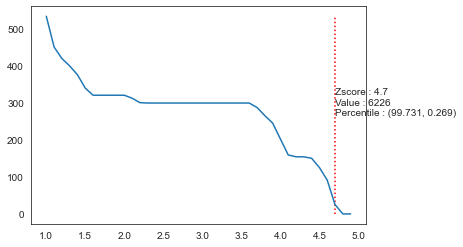

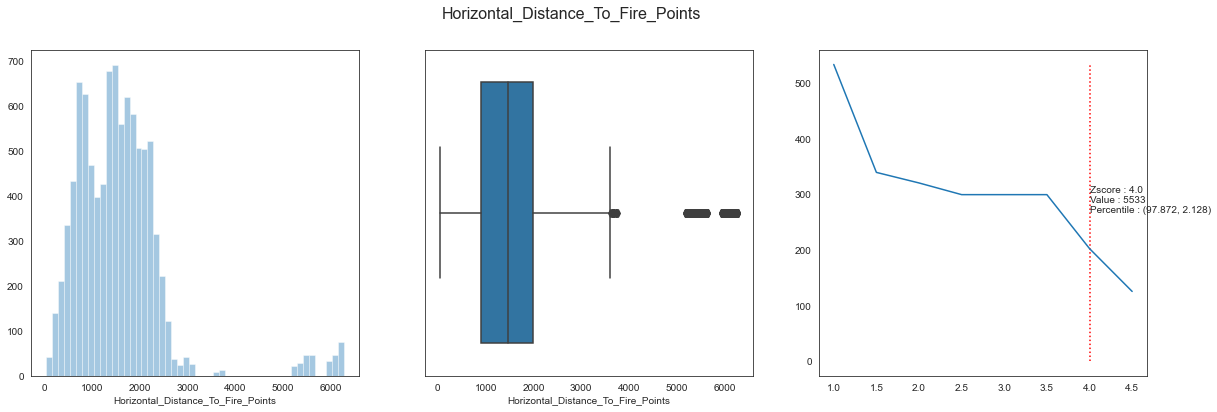

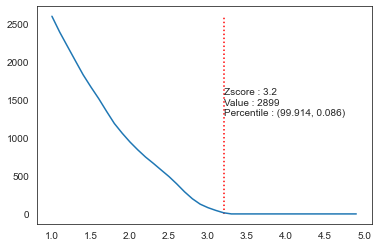

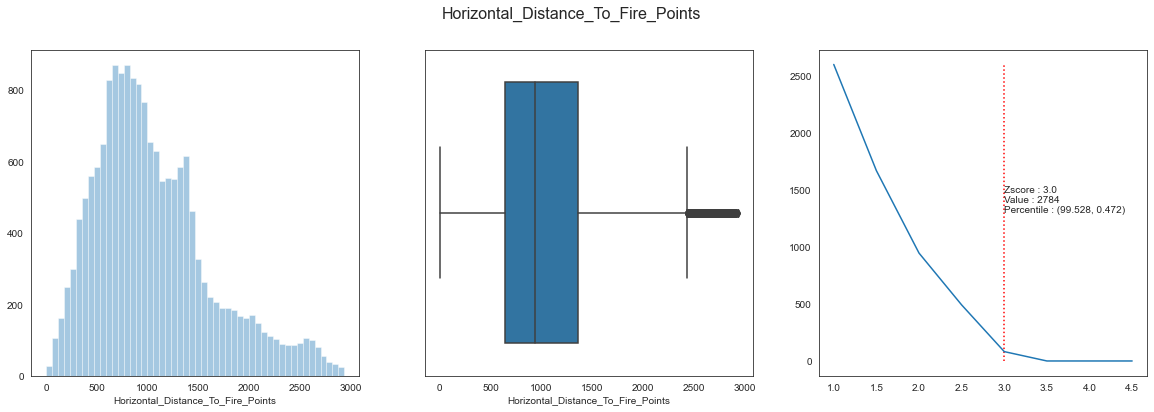

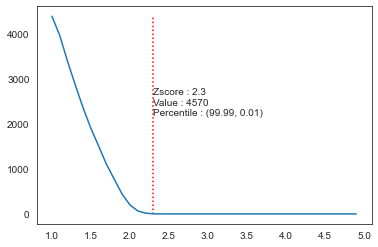

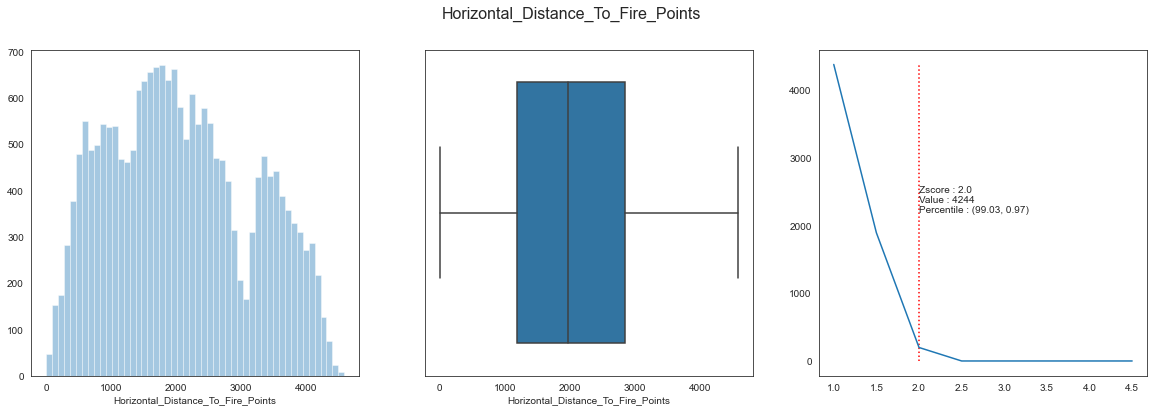

In [269]:
list_zscore = []
for col in df.iloc[:,:10]:
    for counter in range(1,len(df["Cover_Type"].unique())+1):
    
        outlier_zscore(df[df['Cover_Type']==counter], col, min_z=1, max_z = 5, step = 0.1, print_list = False)
        a = outlier_inspect(df[df['Cover_Type']==counter], col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)
        list_zscore.append(a[2])
    
    
    

In [270]:
list_zscore

[3.5,
 2.5,
 2.5,
 2.5,
 2.0,
 2.5,
 4.0,
 1.5,
 1.5,
 1.5,
 3.0,
 2.0,
 1.0,
 1.5,
 4.0,
 4.0,
 3.0,
 2.5,
 4.0,
 4.0,
 3.5,
 4.0,
 4.0,
 3.5,
 3.0,
 4.0,
 3.5,
 3.0,
 3.5,
 4.0,
 4.0,
 3.5,
 3.5,
 3.5,
 4.0,
 2.5,
 2.5,
 4.0,
 2.0,
 3.5,
 3.5,
 2.0,
 1.5,
 1.5,
 1.0,
 1.0,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.5,
 4.0,
 3.5,
 3.5,
 2.0,
 4.0,
 3.0,
 2.0]

In [260]:
a = 0
b = 1
for col in df.iloc[:,:10]:
    for counter in range(1,len(df["Cover_Type"].unique())+1):
        Q1 = df[df["Cover_Type"]==counter][col].quantile(0.25)
        Q3 = df[df["Cover_Type"]==counter][col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-list_zscore[a]*IQR
        upper_lim = Q3+list_zscore[a]*IQR
        print(f"count of outlier in {col} column by Cover_Type {counter}= {df[df['Cover_Type']==counter][(df[df['Cover_Type']==counter][col] < lower_lim) | (df[df['Cover_Type']==counter][col] > upper_lim)][col].count()} ")
        
        a += 1
    a = b*len(df["Cover_Type"].unique())
    b += 1
    
    print()

count of outlier in Elevation column by Cover_Type 1= 0 
count of outlier in Elevation column by Cover_Type 2= 19 
count of outlier in Elevation column by Cover_Type 3= 0 
count of outlier in Elevation column by Cover_Type 4= 0 
count of outlier in Elevation column by Cover_Type 5= 0 
count of outlier in Elevation column by Cover_Type 6= 0 
count of outlier in Elevation column by Cover_Type 7= 13 

count of outlier in Aspect column by Cover_Type 1= 0 
count of outlier in Aspect column by Cover_Type 2= 0 
count of outlier in Aspect column by Cover_Type 3= 0 
count of outlier in Aspect column by Cover_Type 4= 60 
count of outlier in Aspect column by Cover_Type 5= 0 
count of outlier in Aspect column by Cover_Type 6= 0 
count of outlier in Aspect column by Cover_Type 7= 0 

count of outlier in Slope column by Cover_Type 1= 96 
count of outlier in Slope column by Cover_Type 2= 63 
count of outlier in Slope column by Cover_Type 3= 0 
count of outlier in Slope column by Cover_Type 4= 0 
coun

**ii. Drop Outliers**

*You can define another function to detect outliers in accordance with the zscore (how many times IQR) value you choose according to the result from the previous functions.*

In [262]:
a = 0
b = 1
for col in df.iloc[:,:10]:
    for counter in range(1,len(df["Cover_Type"].unique())+1):
        Q1 = df[df["Cover_Type"]==counter][col].quantile(0.25)
        Q3 = df[df["Cover_Type"]==counter][col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-list_zscore[a]*IQR
        upper_lim = Q3+list_zscore[a]*IQR
        df[col][(df['Cover_Type']==counter) &((df[df['Cover_Type']==counter][col] < lower_lim) | (df[df['Cover_Type']==counter][col] > upper_lim))] = np.nan
        a += 1
    a = b*len(df["Cover_Type"].unique())
    b += 1
    df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("median"))
    

In [263]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [264]:
df.shape

(581012, 55)

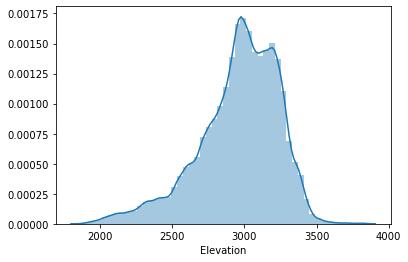

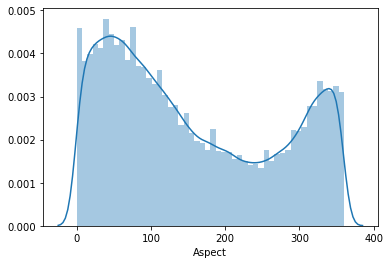

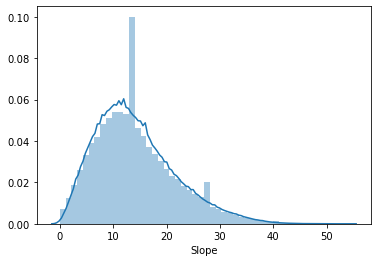

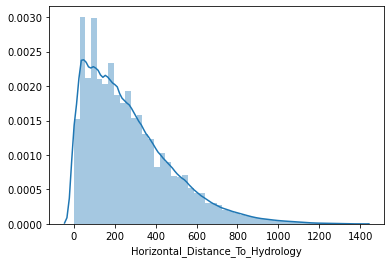

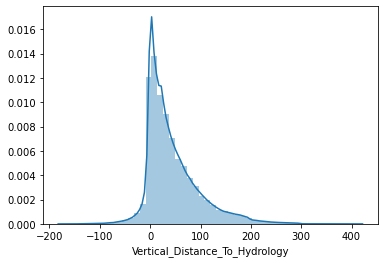

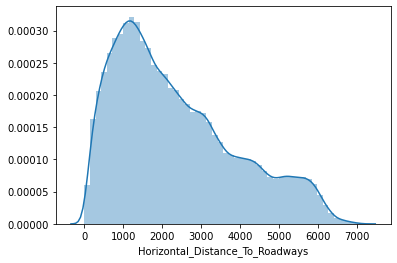

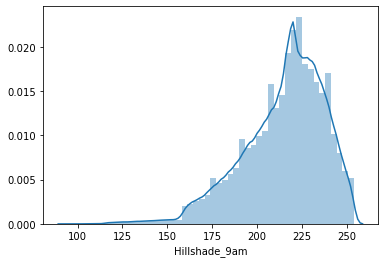

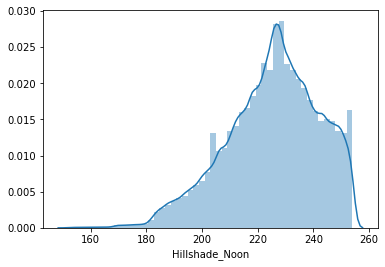

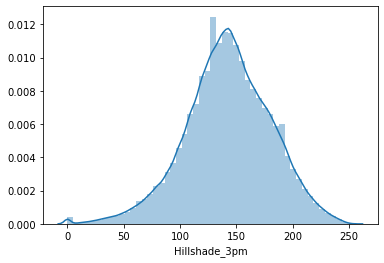

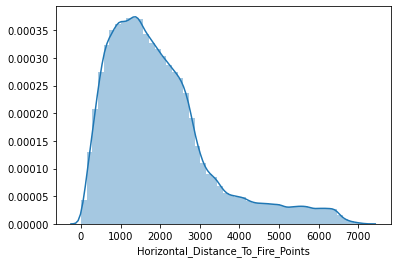

In [265]:
for col in df.iloc[:,:10]:
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

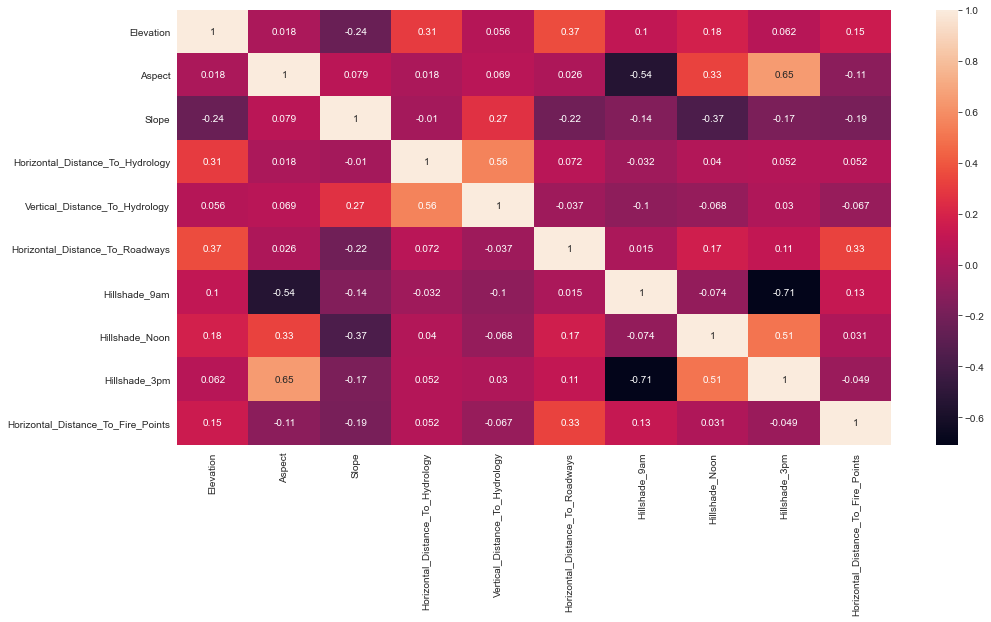

In [266]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.iloc[:,:10].corr(), annot = True)

In [267]:
unique_list = []
for col in df:
    unique_list.append(len(df[col].unique()))
np.array(unique_list)

array([1970,  361,   54,  551,  568, 5785,  160,  103,  255, 5827,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    7])

In [268]:
df.corr()[-1:].T.sort_values(by = "Cover_Type", ascending = False)

Cover_Type
Cover_Type                            1.000000
Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.149244
Soil_Type40                           0.128351
Vertical_Distance_To_Hydrology        0.119976
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Aspect                                0.016140
Soil_Type16                           0.009844
Soil_Type18                           0.007390
Soil_Type15                           0.006425
Soil_Type34                           0.004643
Soil_Type26                          -0.000375
Soil_Type7                           -0.000496
Soil_Type28                          -0.001702
Soil_Type8                           -0.003667
Soil_Type9                           -0.006110
Soil_Type25                          -0.006449
Soil_Type30                          -0.010436
Soil_Type27                          -0.014407
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type12                          -0.023601
Soil_Type21                          -0.025400
Soil_Type20                          -0.028665
Soil_Type19                          -0.036452
Hillshade_3pm                        -0.041063
Wilderness_Area2                     -0.048059
Hillshade_9am                        -0.052731
Soil_Type33                          -0.062502
Soil_Type31                          -0.065347
Soil_Type24                          -0.068746
Soil_Type32                          -0.075562
Hillshade_Noon                       -0.094525
Horizontal_Distance_To_Fire_Points   -0.109007
Soil_Type29                          -0.124933
Soil_Type23                          -0.135055
Soil_Type22                          -0.141746
Horizontal_Distance_To_Roadways      -0.153450
Wilderness_Area1                     -0.203913
Elevation                            -0.269756

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [27]:
import sqlite3
tree_database = sqlite3.connect("df")
c = tree_database.cursor()

In [28]:
df.to_sql('tree1', tree_database, if_exists='replace', index = False)

In [29]:
for row in c.execute('''SELECT COUNT(*) FROM tree1'''):
    print(row)

(581012,)


In [30]:
c.execute('''SELECT Elevation, MAX(Elevation) FROM tree1''')

In [31]:
c.fetchall()

[(3858, 3858)]

In [32]:
c.execute('''SELECT * FROM tree1''')

In [33]:
df = pd.DataFrame(c.fetchall(), columns = df.columns)
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51    3.0                               258   
1       2590      56    2.0                               212   
2       2804     139    9.0                               268   
3       2785     155   18.0                               242   
4       2595      45    2.0                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                              510   
1                            -6.0                              390   
2                            65.0                             3180   
3                           118.0                             3090   
4                            -1.0                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0            148   
1          220.0           235.0            151   
2          234.0           238.0            135   
3          238.0           238.0            122   
4          220.0           234.0            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [34]:
df.shape

(581012, 55)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [27]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [28]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [29]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [30]:
a = pd.DataFrame(X_train, columns = X.columns)

In [31]:
a.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -1.285186 -0.390208 -1.354317                         -0.270778   
1   1.024138  1.478052 -1.488592                          0.942903   
2   0.255555  0.861258 -1.488592                          2.123655   
3   0.209082 -0.417025  1.868268                         -0.364862   
4  -0.066178  1.594260 -0.548671                         -0.548325   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.834265                        -1.025567   
1                        3.414527                         0.374329   
2                        0.474605                         2.126444   
3                        0.796788                        -0.332676   
4                       -0.491945                        -0.597643   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.546322        0.595055      -0.013188   
1      -0.125038        0.654699       0.535812   
2      -0.080280        0.952917       0.614241   
3       1.754769       -1.790692      -2.470615   
4      -0.796397        0.117906       0.692669   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type31  Soil_Type32  \
0                            2.733839  ...    -0.214762    -0.315534   
1                            0.802555  ...     4.656324    -0.315534   
2                            3.034446  ...    -0.214762    -0.315534   
3                            0.643943  ...    -0.214762    -0.315534   
4                           -1.068306  ...     4.656324    -0.315534   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0    -0.290388     -0.05259    -0.057203    -0.014669    -0.022299   
1    -0.290388     -0.05259    -0.057203    -0.014669    -0.022299   
2    -0.290388     -0.05259    -0.057203    -0.014669    -0.022299   
3     3.443669     -0.05259    -0.057203    -0.014669    -0.022299   
4    -0.290388     -0.05259    -0.057203    -0.014669    -0.022299   

   Soil_Type38  Soil_Type39  Soil_Type40  
0    -0.165604    -0.155755    -0.123447  
1    -0.165604    -0.155755    -0.123447  
2    -0.165604    -0.155755    -0.123447  
3    -0.165604    -0.155755    -0.123447  
4    -0.165604    -0.155755    -0.123447  

[5 rows x 54 columns]

In [44]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=4, n_jobs=-1).fit(X_train_sc, y_train)

In [45]:
y_pred = knn_model.predict(X_test_sc)
confusion_matrix(y_test, y_pred)

array([[39230,  2548,     6,     0,    40,    10,   182],
       [ 2315, 53916,   168,     1,   238,   146,    31],
       [    1,   152,  6703,    54,    19,   298,     0],
       [    0,     0,    94,   430,     0,    39,     0],
       [   38,   306,    10,     0,  1534,     8,     0],
       [   10,   156,   297,    15,     5,  3022,     0],
       [  204,    41,     0,     0,     2,     0,  3934]], dtype=int64)

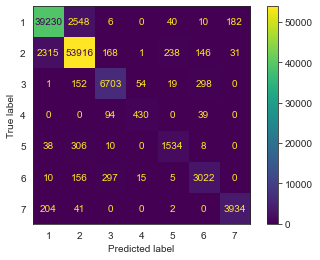

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test_sc,y_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94     42016
           2       0.94      0.95      0.95     56815
           3       0.92      0.93      0.92      7227
           4       0.86      0.76      0.81       563
           5       0.83      0.81      0.82      1896
           6       0.86      0.86      0.86      3505
           7       0.95      0.94      0.94      4181

    accuracy                           0.94    116203
   macro avg       0.90      0.88      0.89    116203
weighted avg       0.94      0.94      0.94    116203



### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [75]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42016
           2       0.95      0.95      0.95     56815
           3       0.93      0.93      0.93      7227
           4       0.85      0.84      0.85       563
           5       0.83      0.82      0.83      1896
           6       0.88      0.88      0.88      3505
           7       0.95      0.95      0.95      4181

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [76]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[39355,  2409,     3,     0,    37,    13,   199],
       [ 2353, 53878,   160,     1,   263,   132,    28],
       [    0,   157,  6754,    63,    16,   237,     0],
       [    0,     3,    63,   475,     0,    22,     0],
       [   44,   267,    12,     0,  1562,    11,     0],
       [    9,   118,   251,    21,     7,  3099,     0],
       [  188,    24,     0,     0,     1,     0,  3968]], dtype=int64)

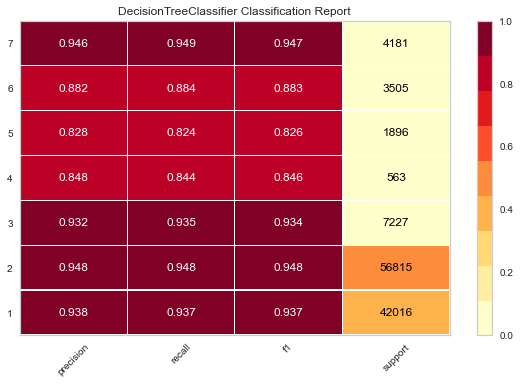

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [122]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(dt_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure        

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf_model = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3).fit(X_train, y_train)

In [124]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[39566,  2348,     4,     0,    11,     8,    79],
       [ 1221, 55338,   109,     4,    69,    63,    11],
       [    0,    94,  6982,    23,     7,   121,     0],
       [    0,     0,    59,   481,     0,    23,     0],
       [   18,   407,    20,     0,  1448,     3,     0],
       [    2,   100,   191,     9,     2,  3201,     0],
       [  184,    25,     0,     0,     0,     0,  3972]], dtype=int64)

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42016
           2       0.95      0.97      0.96     56815
           3       0.95      0.97      0.96      7227
           4       0.93      0.85      0.89       563
           5       0.94      0.76      0.84      1896
           6       0.94      0.91      0.92      3505
           7       0.98      0.95      0.96      4181

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



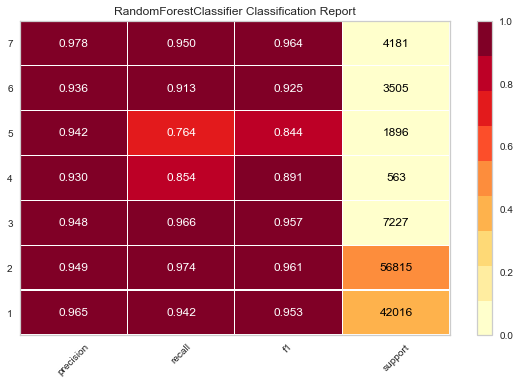

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [123]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure    

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
from xgboost import XGBClassifier

In [116]:
xgb_model5 = XGBClassifier(n_estimators = 500,  learning_rate = 0.4, max_depth= 33, subsample =0.8, n_jobs = -1, min_samples_split =3 ).fit(X_train, y_train, 
             early_stopping_rounds=15,
             eval_set=[(X_test, y_test)],
             verbose=True)

[15:24:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.07117
Will train until validation_0-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.05328
[2]	validation_0-merror:0.04619
[3]	validation_0-merror:0.04176
[4]	validation_0-merror:0.03857
[5]	validation_0-merror:0.03644
[6]	validation_0-merror:0.03510
[7]	validation_0-merror:0.03342
[8]	validation_0-merror:0.03268
[9]	validation_0-merror:0.03188
[10]	validation_0-merror:0.03089
[11]	validation_0-merror:0.03027
[12]	validation_0-merror:0.02992
[13]	validation_0-merror:0.02942
[14]	validation_0-merror:0.02908
[15]	validation_0-merror:0.02867
[16]	validation_0-me

In [117]:
y_pred = xgb_model5.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97     42016
           2       0.98      0.98      0.98     56815
           3       0.97      0.98      0.97      7227
           4       0.93      0.89      0.91       563
           5       0.94      0.89      0.92      1896
           6       0.96      0.95      0.96      3505
           7       0.98      0.97      0.98      4181

    accuracy                           0.97    116203
   macro avg       0.96      0.95      0.95    116203
weighted avg       0.97      0.97      0.97    116203



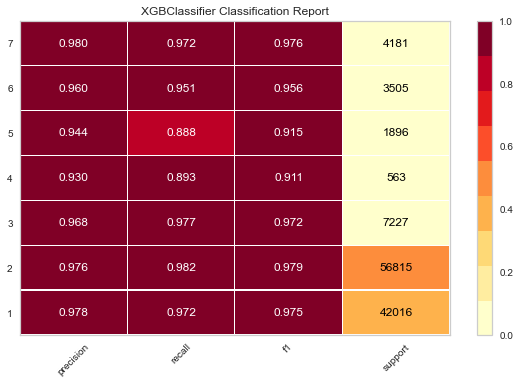

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [126]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(xgb_model5, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure    

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [29]:
from sklearn.svm import LinearSVC

In [30]:
from sklearn.preprocessing import scale, StandardScaler

In [31]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [40]:
svm_model = LinearSVC(C=11).fit(X_train_s, y_train)

In [41]:
y_pred = svm_model.predict(X_test_s)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.64      0.66     42016
           2       0.72      0.81      0.76     56815
           3       0.62      0.83      0.71      7227
           4       0.45      0.23      0.31       563
           5       0.11      0.00      0.01      1896
           6       0.42      0.06      0.10      3505
           7       0.47      0.39      0.43      4181

    accuracy                           0.69    116203
   macro avg       0.50      0.42      0.43    116203
weighted avg       0.67      0.69      0.68    116203



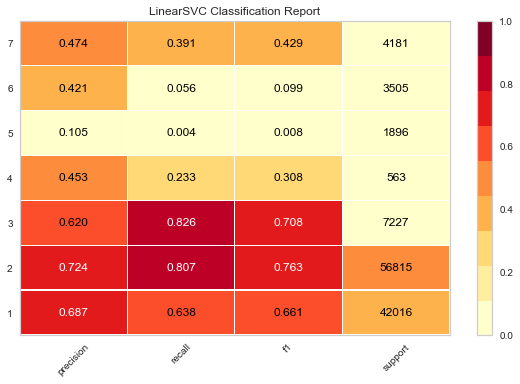

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_s, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_s, y_test)        # Evaluate the model on the test data
visualizer.show()  

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

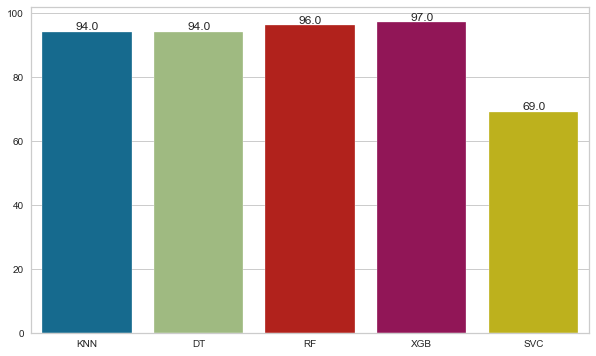

In [52]:
models = ["KNN", "DT", "RF", "XGB", "SVC"]
scores = [94, 94, 96, 97, 69]
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(models, scores )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6));

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___